# AML: Homework 1 Question 2 - Mitanshu Bhoot
###Dataset - Bike Sharing Demand Prediction



Project Summary:

- Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
- It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.
Eventually, providing the city with a stable supply of rental bikes becomes a major concern.
- The crucial part is the ***prediction of bike count*** required at each hour for the stable supply of rental bikes.

Data Description:

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

###All the questions have been answered one after another throughout the implementation. Keep scrolling until you find a detailed summary for each answer.

# A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

bike_df=pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv',encoding ='latin')

Mounted at /content/drive


In [ ]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
print("Shape:", bike_df.shape)
print("Features of the dataset:")
bike_df.columns

Shape: (8760, 14)
Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#unique values in the features
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Checking for Duplicate Values
print("No. of Duplicates in the data:  ",len(bike_df[bike_df.duplicated()]))

No. of Duplicates in the data:   0


In [ ]:
# Missing Values/Null Values Count
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

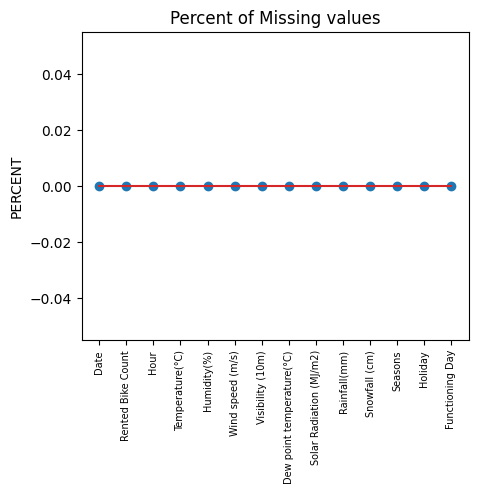

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(5,4))
ax = plt.stem(missing['index'], missing[0])
plt.xticks(rotation=90, fontsize=7)
plt.title("Percent of Missing values")
plt.ylabel("PERCENT")
plt.show()


***Through above, we can conclude that there are no missing or duplicate values present in the data***

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

### Some important data preprocessing

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

#Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* Basically since Python reads the "Date" column as an object type (string) and the date column is crucial for analyzing user behavior, it needs to be converted to a datetime format.
* We then split it into three distinct columns, namely "year," "month," and "day," which can be categorized as a data type.

In [ ]:
#Change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

In [ ]:
bike_df.describe().T

count         mean         std   min    25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.0   504.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.5    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.0    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.9     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.0  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.7     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.0     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.0     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.0     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# Answer A: Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

### 1. **Data Summary**
- **Total Entries**: 8,760 rows, representing hourly data over a year.
- **Total Features**: 14 attributes, including both continuous and categorical variables.

### 2. **Continuous Valued Attributes**
These are the numerical features that can take any value within a range and are typically measured quantities:

- **Rented Bike Count**:
  - **Mean**: 704.6 bikes per hour.
  - **Range**: 0 to 3,556 bikes, showing significant variability in hourly rentals.
  - **Median (50th Percentile)**: 504.5 bikes.

- **Hour**:
  - **Range**: 0 (midnight) to 23 (11 PM).
  - **Distribution**: Evenly distributed across all 24 hours.

- **Temperature**:
  - **Mean**: 12.88°C.
  - **Range**: -17.8°C to 39.4°C, indicating diverse seasonal conditions.

- **Humidity**:
  - **Mean**: 58.23%.
  - **Range**: 0% to 98%, covering a wide range of moisture levels.

- **Wind Speed**:
  - **Mean**: 1.72 m/s.
  - **Range**: 0 to 7.4 m/s, indicating generally calm conditions with occasional breezes.

- **Visibility**:
  - **Mean**: 1,436.8 meters.
  - **Range**: 27 meters to 2,000 meters (maximum recorded distance).

- **Dew Point Temperature**:
  - **Mean**: 4.07°C.
  - **Range**: -30.6°C to 27.2°C.

- **Solar Radiation**:
  - **Mean**: 0.569 MJ/m².
  - **Range**: 0 to 3.52 MJ/m², showing variations from nighttime to bright sunny days.

- **Rainfall**:
  - **Mean**: 0.15 mm.
  - **Range**: 0 to 35 mm, with most hours having no rainfall.

- **Snowfall**:
  - **Mean**: 0.075 cm.
  - **Range**: 0 to 8.8 cm, indicating that snowfall is infrequent but can be heavy.


### 3. **Categorical Attributes**
These are features that represent distinct categories or labels:

- **Month**:
  - **Range**: 1 (January) to 12 (December), covering all months of the year.
  - **Mean**: 6.53 (around June).

- **Weekdays/Weekend**:
  - **Binary Feature**: 0 for weekdays, 1 for weekends.
  - **Mean**: 0.28, reflecting a higher frequency of data points on weekdays.

- **Seasons**: The season during which the data was recorded (Spring, Summer, Autumn, Winter).
- **Holiday**: Whether the day is a holiday or not (Yes/No).
- **Functional Day**: Whether the day is a working day (Yes/No).

# B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

## Exploratory Data Analysis

- Dependent variable : "Rented Bike Count"
- We will analysis this column with the other columns by using some visualisation plots.

In [ ]:
#Statistical Summary

bike_df.describe()

Rented_Bike_Count  Temperature     Humidity   Wind_speed   Visibility  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    12.882922    58.226256     1.724909  1436.825799   
std           644.997468    11.944825    20.362413     1.036300   608.298712   
min             0.000000   -17.800000     0.000000     0.000000    27.000000   
25%           191.000000     3.500000    42.000000     0.900000   940.000000   
50%           504.500000    13.700000    57.000000     1.500000  1698.000000   
75%          1065.250000    22.500000    74.000000     2.300000  2000.000000   
max          3556.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew_point_temperature  Solar_Radiation     Rainfall     Snowfall  
count            8760.000000      8760.000000  8760.000000  8760.000000  
mean                4.073813         0.569111     0.148687     0.075068  
std                13.060369         0.868746     1.128193     0.436746  
min               -30.600000         0.000000     0.000000     0.000000  
25%                -4.700000         0.000000     0.000000     0.000000  
50%                 5.100000         0.010000     0.000000     0.000000  
75%                14.800000         0.930000     0.000000     0.000000  
max                27.200000         3.520000    35.000000     8.800000

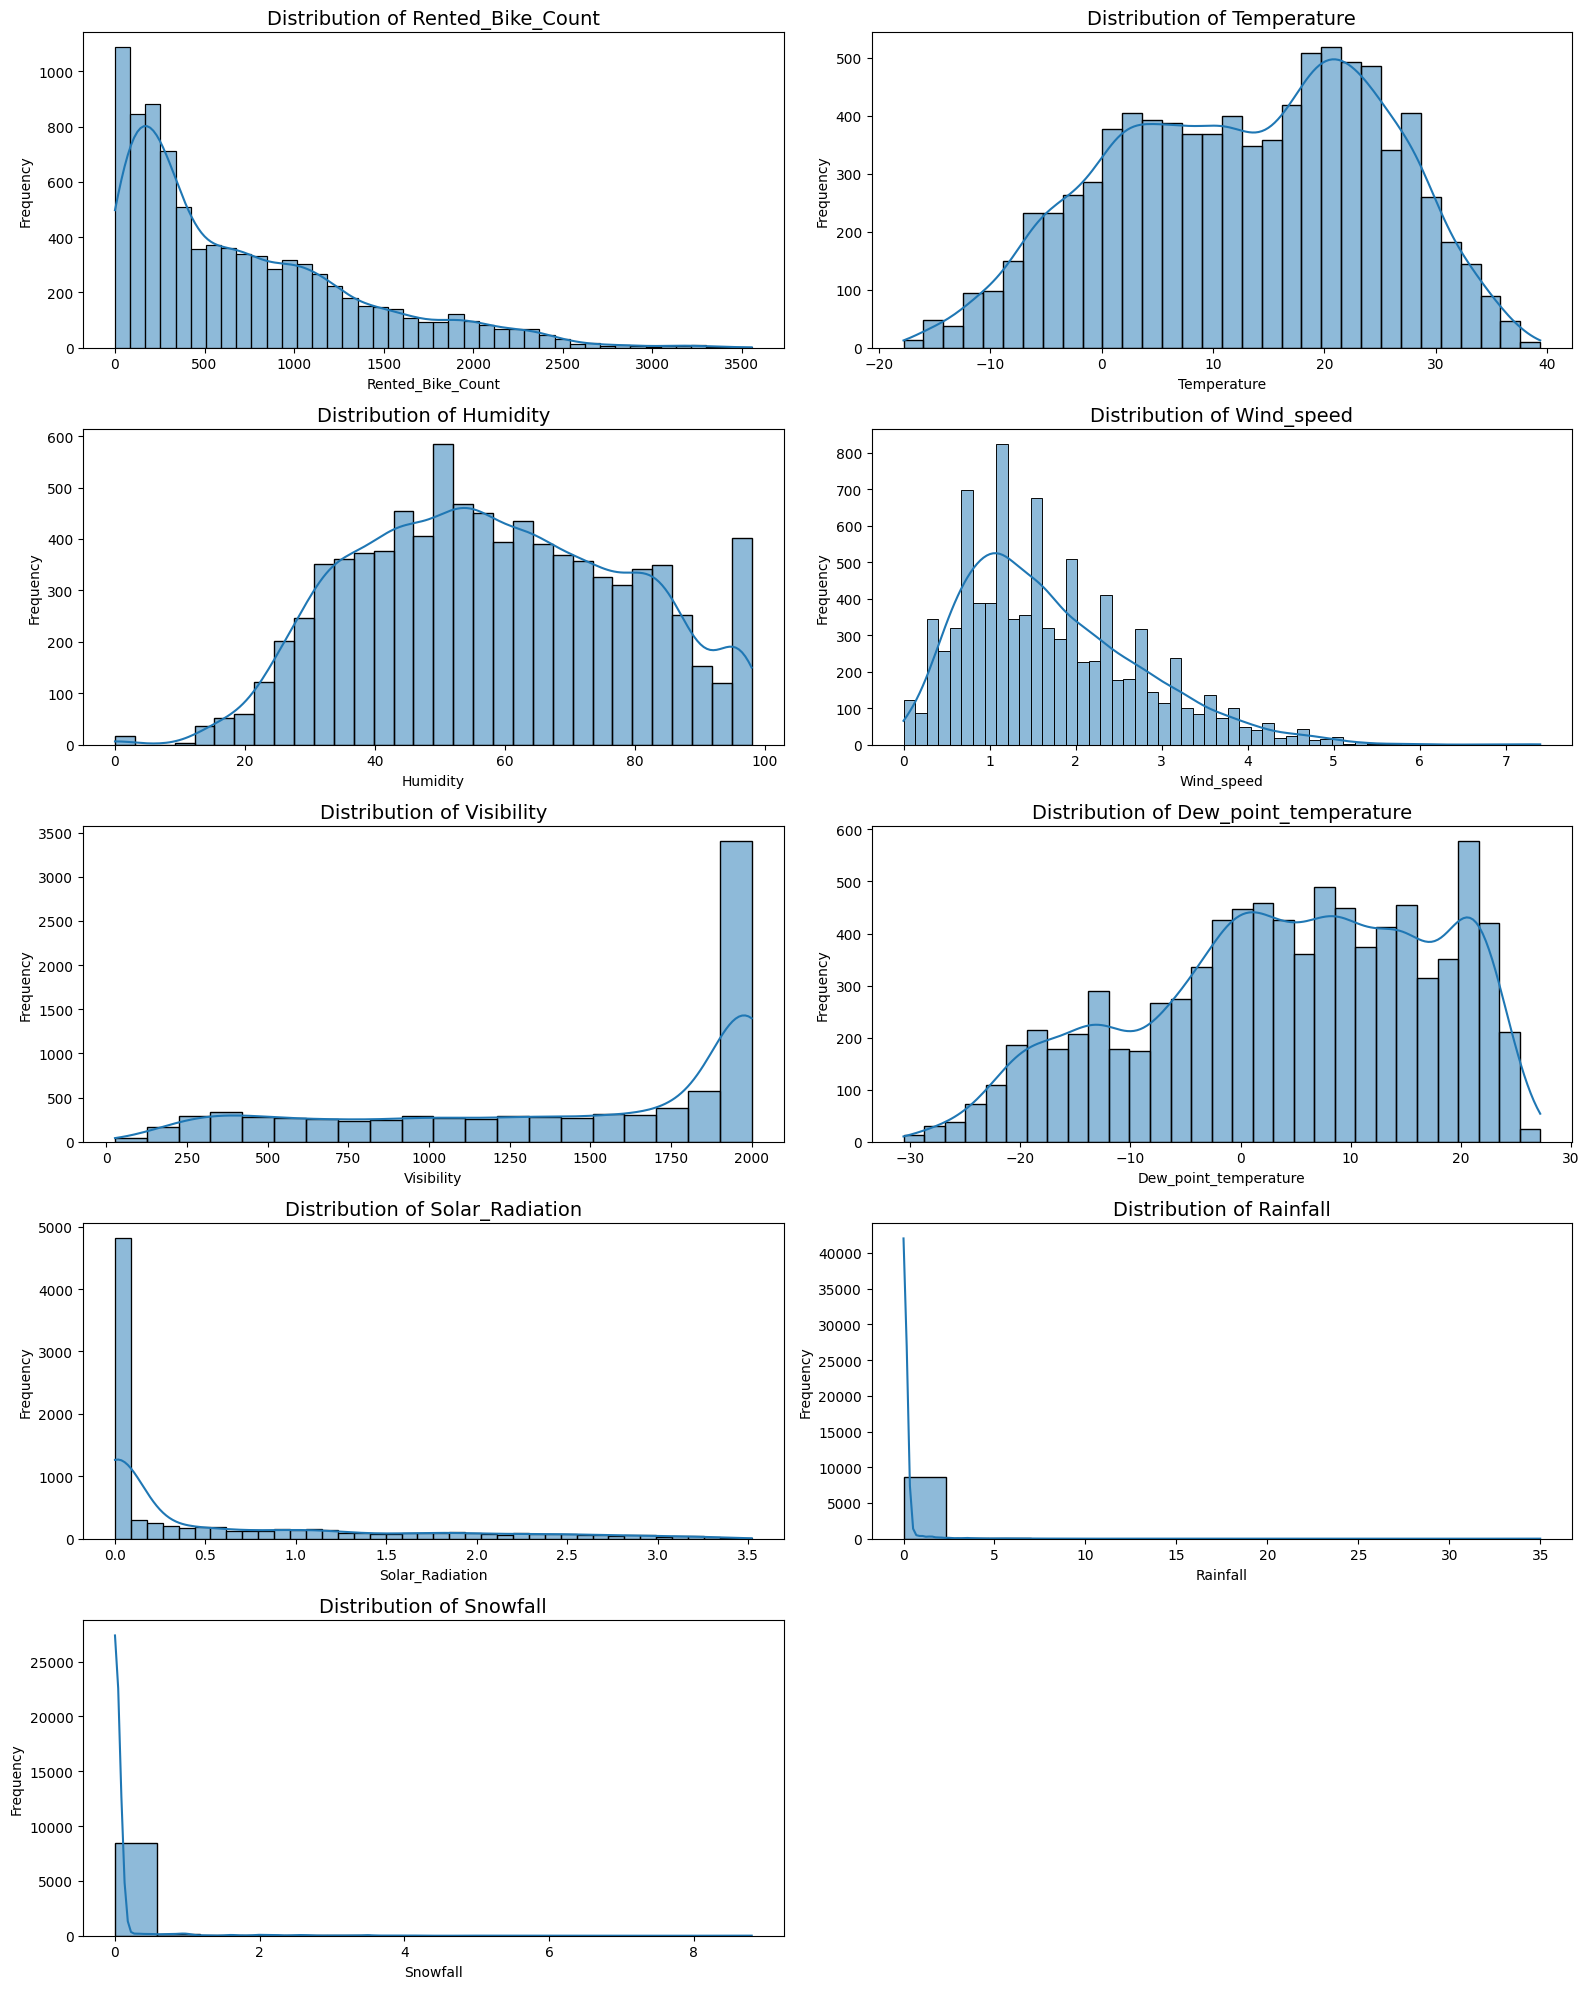

In [ ]:
continuous_columns = bike_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 20))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(bike_df[column].dropna(), kde=True)  # Histogram with kernel density estimate (KDE)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

####Month

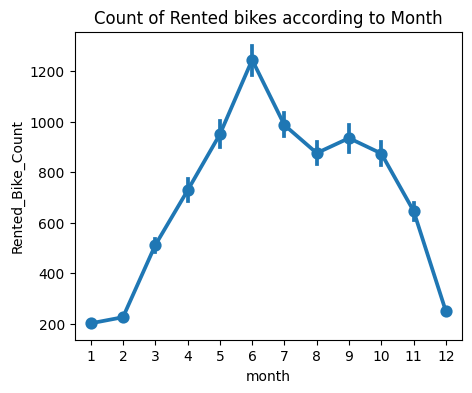

In [ ]:
#Count of Rented bikes according to Month
fig, ax = plt.subplots(figsize=(5, 4))
sns.pointplot(data=bike_df, x='month', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of Rented bikes according to Month')
plt.show()

* ***Based on the point plot shown above, it is evident that the demand for rented bikes is higher from the months of May to October as compared to other months. It is worth noting that these months fall within the summer season***

####Working Day

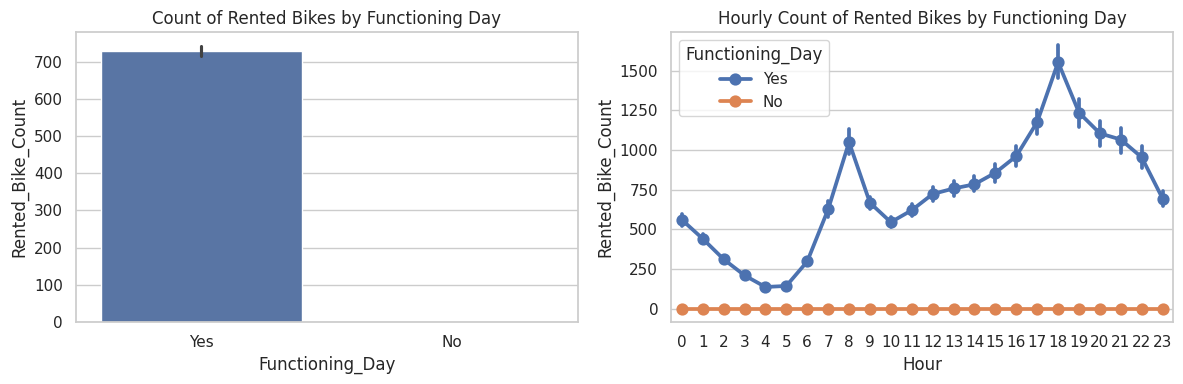

In [ ]:
#Working Day vs Rented Bikes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=bike_df, x='Functioning_Day', y='Rented_Bike_Count', ax=ax1)
ax1.set(title='Count of Rented Bikes by Functioning Day')

sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Functioning_Day', ax=ax2)
ax2.set(title='Hourly Count of Rented Bikes by Functioning Day')

plt.tight_layout()
plt.show()

* ***The bar plot and point plot displayed above depict the utilization of rented bikes on working and non-working days. It is evident from the plot that people do not use rented bikes on non-functioning days.***

####Hour

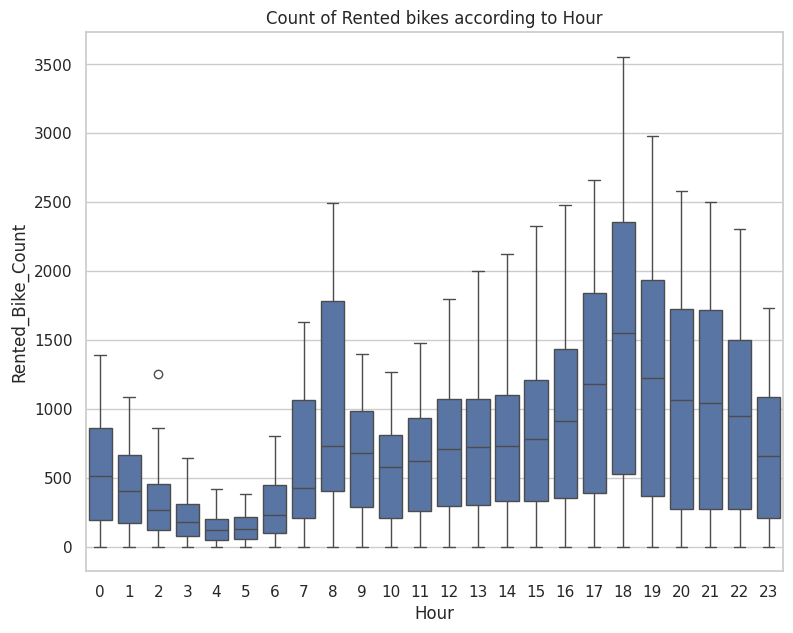

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(data=bike_df, x='Hour', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of Rented bikes according to Hour')
plt.show()


* ***The plot above showcases the usage of rented bikes across different hours throughout the year. It is notable that people tend to use rented bikes during their working hours, specifically from 7 AM to 9 AM and 5 PM to 7 PM.***   

####Weekdays_Weekend

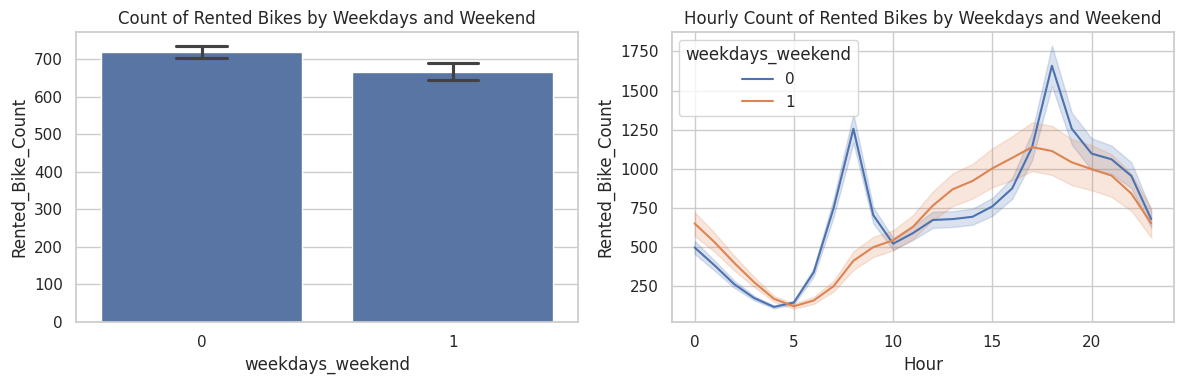

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=bike_df, x='weekdays_weekend', y='Rented_Bike_Count', ax=ax1, capsize=.2)
ax1.set(title='Count of Rented Bikes by Weekdays and Weekend')

sns.lineplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='weekdays_weekend', ax=ax2)
ax2.set(title='Hourly Count of Rented Bikes by Weekdays and Weekend')

plt.tight_layout()
plt.show()


* ***Based on the line and bar plots above, we can observe that the demand for rented bikes is higher on weekdays, represented by the blue color, which is likely due to the increased demand for transportation to and from the office. The peak demand times during weekdays are between 7am-9am and 5pm-7pm. On weekends, represented by the orange color, the demand for rented bikes is generally lower, especially during the morning hours. However, in the evening, between 4pm-8pm, we can observe a slight increase in demand for rented bikes.***

####Seasons

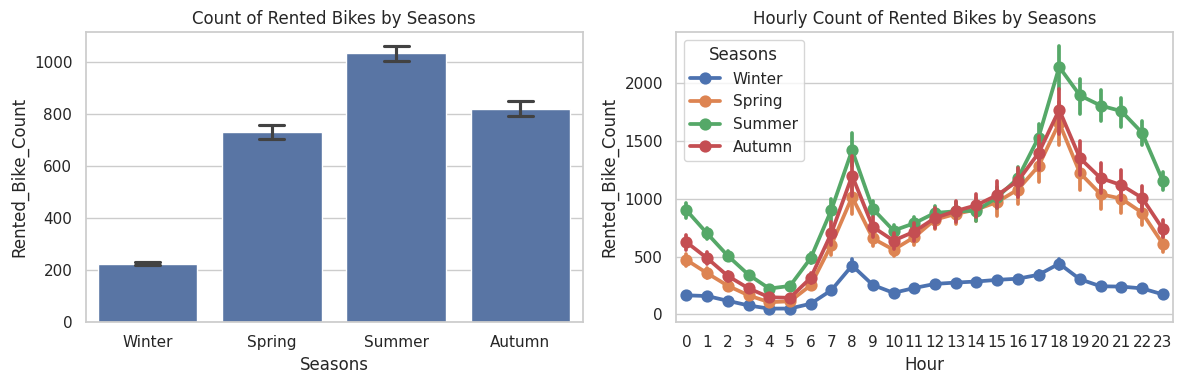

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=bike_df, x='Seasons', y='Rented_Bike_Count', ax=ax1, capsize=.2)
ax1.set(title='Count of Rented Bikes by Seasons')

sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Seasons', ax=ax2)
ax2.set(title='Hourly Count of Rented Bikes by Seasons')

plt.tight_layout()
plt.show()


* ***The bar plot and point plot presented above depict the usage of rented bikes across four distinct seasons. The analysis reveals that the use of rented bikes is significantly high during the summer season with peak demand during 7am-9am and 5pm-7pm. However, during the winter season, the use of rented bikes is quite low due to snowfall.***

####Holiday

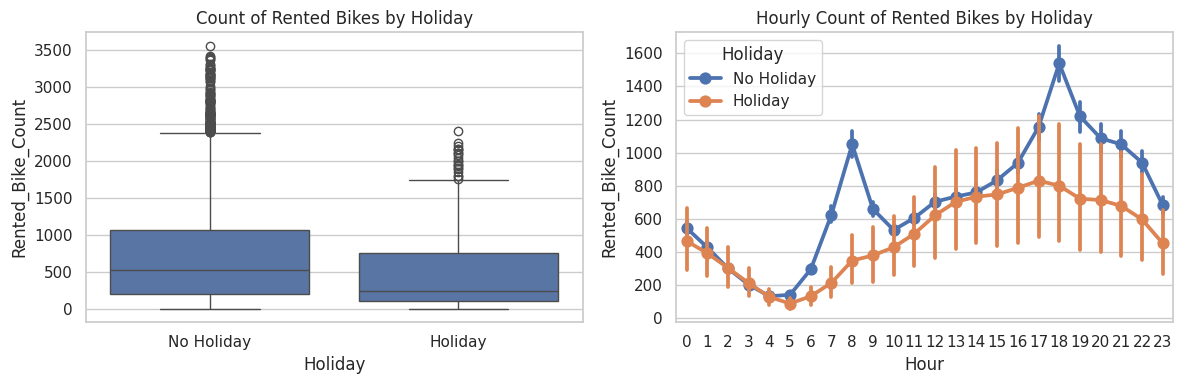

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=bike_df, x='Holiday', y='Rented_Bike_Count', ax=ax1)
ax1.set(title='Count of Rented Bikes by Holiday')

sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Holiday', ax=ax2)
ax2.set(title='Hourly Count of Rented Bikes by Holiday')

plt.tight_layout()
plt.show()


* ***The bar plot and point plot displayed above illustrate the usage of rented bikes during holidays, indicating that people tend to use rented bikes primarily between 2pm and 8pm.***

##**Analysis of Numerical variables**

In [ ]:
#assign the numerical column to variable
num_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
num_features=pd.Index(num_columns)
num_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

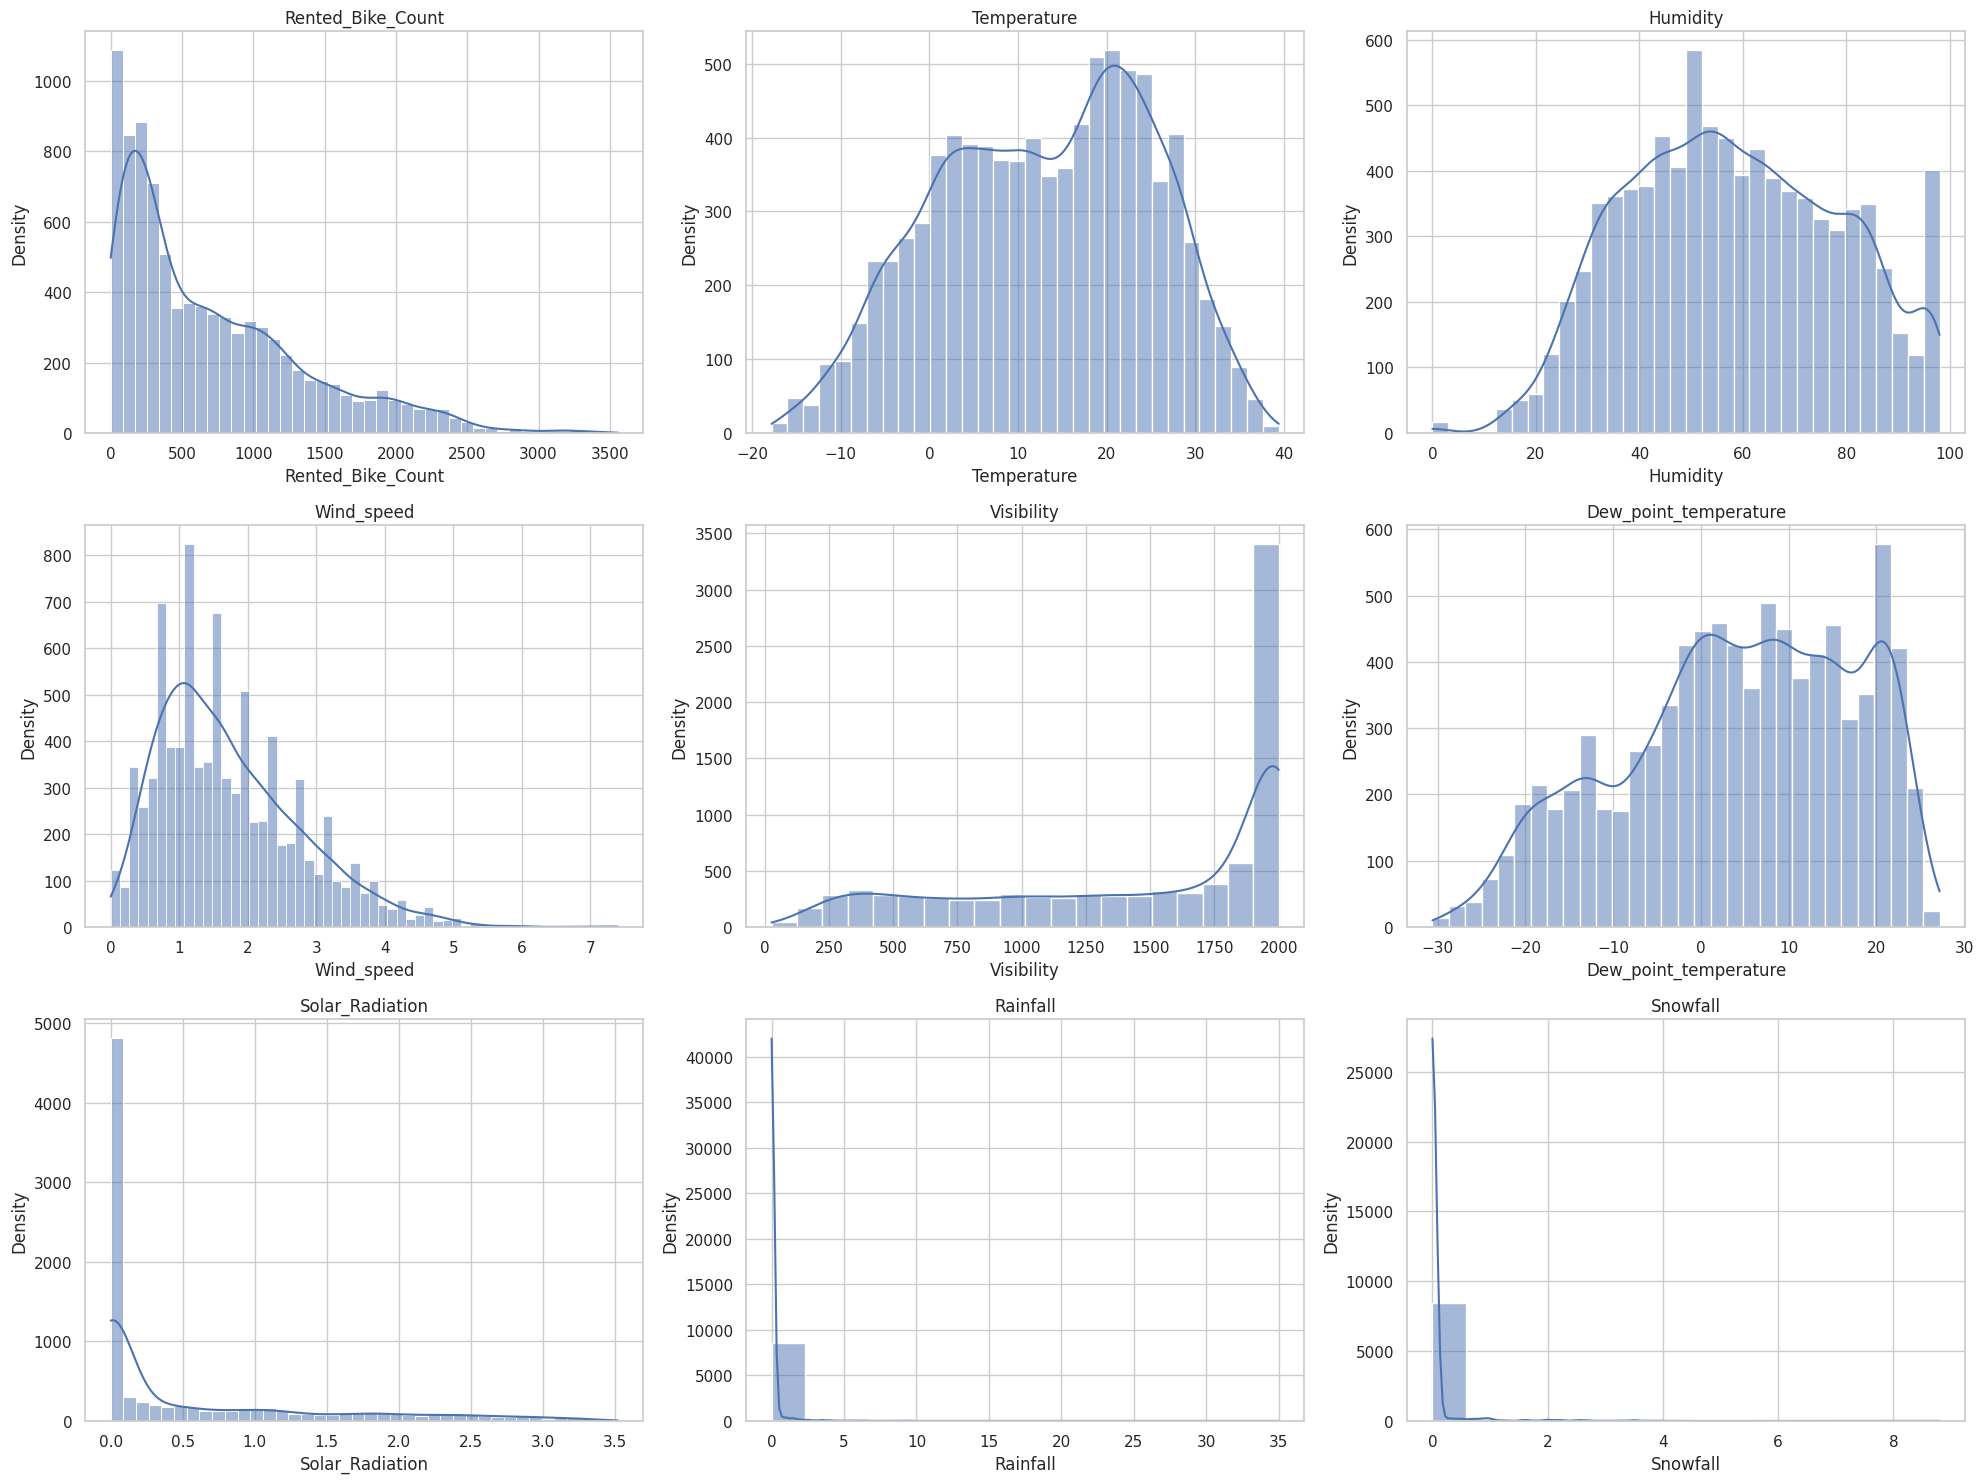

In [ ]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(bike_df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Numerical vs.Rented_Bike_Count

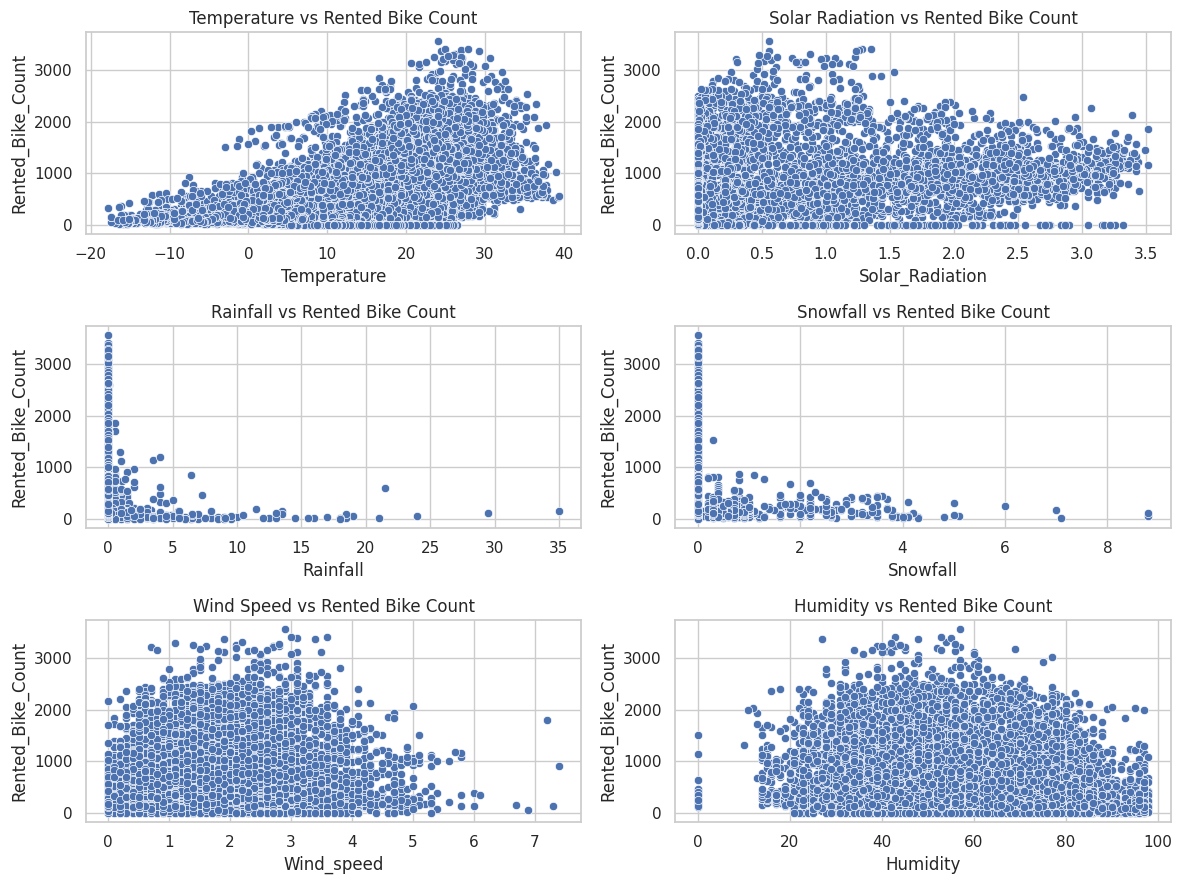

In [ ]:
def scatterPlot(x, y, title, ax):
    sns.scatterplot(data=bike_df, x=x, y=y, ax=ax)
    ax.set(title=title)

fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()

features = [
    ("Temperature", "Temperature vs Rented Bike Count"),
    ("Solar_Radiation", "Solar Radiation vs Rented Bike Count"),
    ("Rainfall", "Rainfall vs Rented Bike Count"),
    ("Snowfall", "Snowfall vs Rented Bike Count"),
    ("Wind_speed", "Wind Speed vs Rented Bike Count"),
    ("Humidity", "Humidity vs Rented Bike Count")
]

for i, (feature, title) in enumerate(features):
    scatterPlot(feature, "Rented_Bike_Count", title, axes[i])

plt.tight_layout()
plt.show()


#Conclusions:
1. Individuals tend to prefer biking when the temperature is relatively high, averaging around 25°C.

2. The number of rented bikes significantly increases with the presence of solar radiation, reaching a count of approximately 1000.

3. despite heavy rainfall, the demand for rented bikes does not decrease. For instance, even with a rainfall of 20 mm, there is a significant peak in the number of rented bikes.

4. When the snowfall is more than 4 cm, there is a significant drop in the number of rented bikes, as shown on the y-axis.

5. The demand for rented bikes is evenly distributed regardless of the wind speed. However, there is a spike in bike rentals when the wind speed is at 7 m/s, indicating that people enjoy riding bikes when there is a slight breeze. Same for Humidity.



###Regression Plots

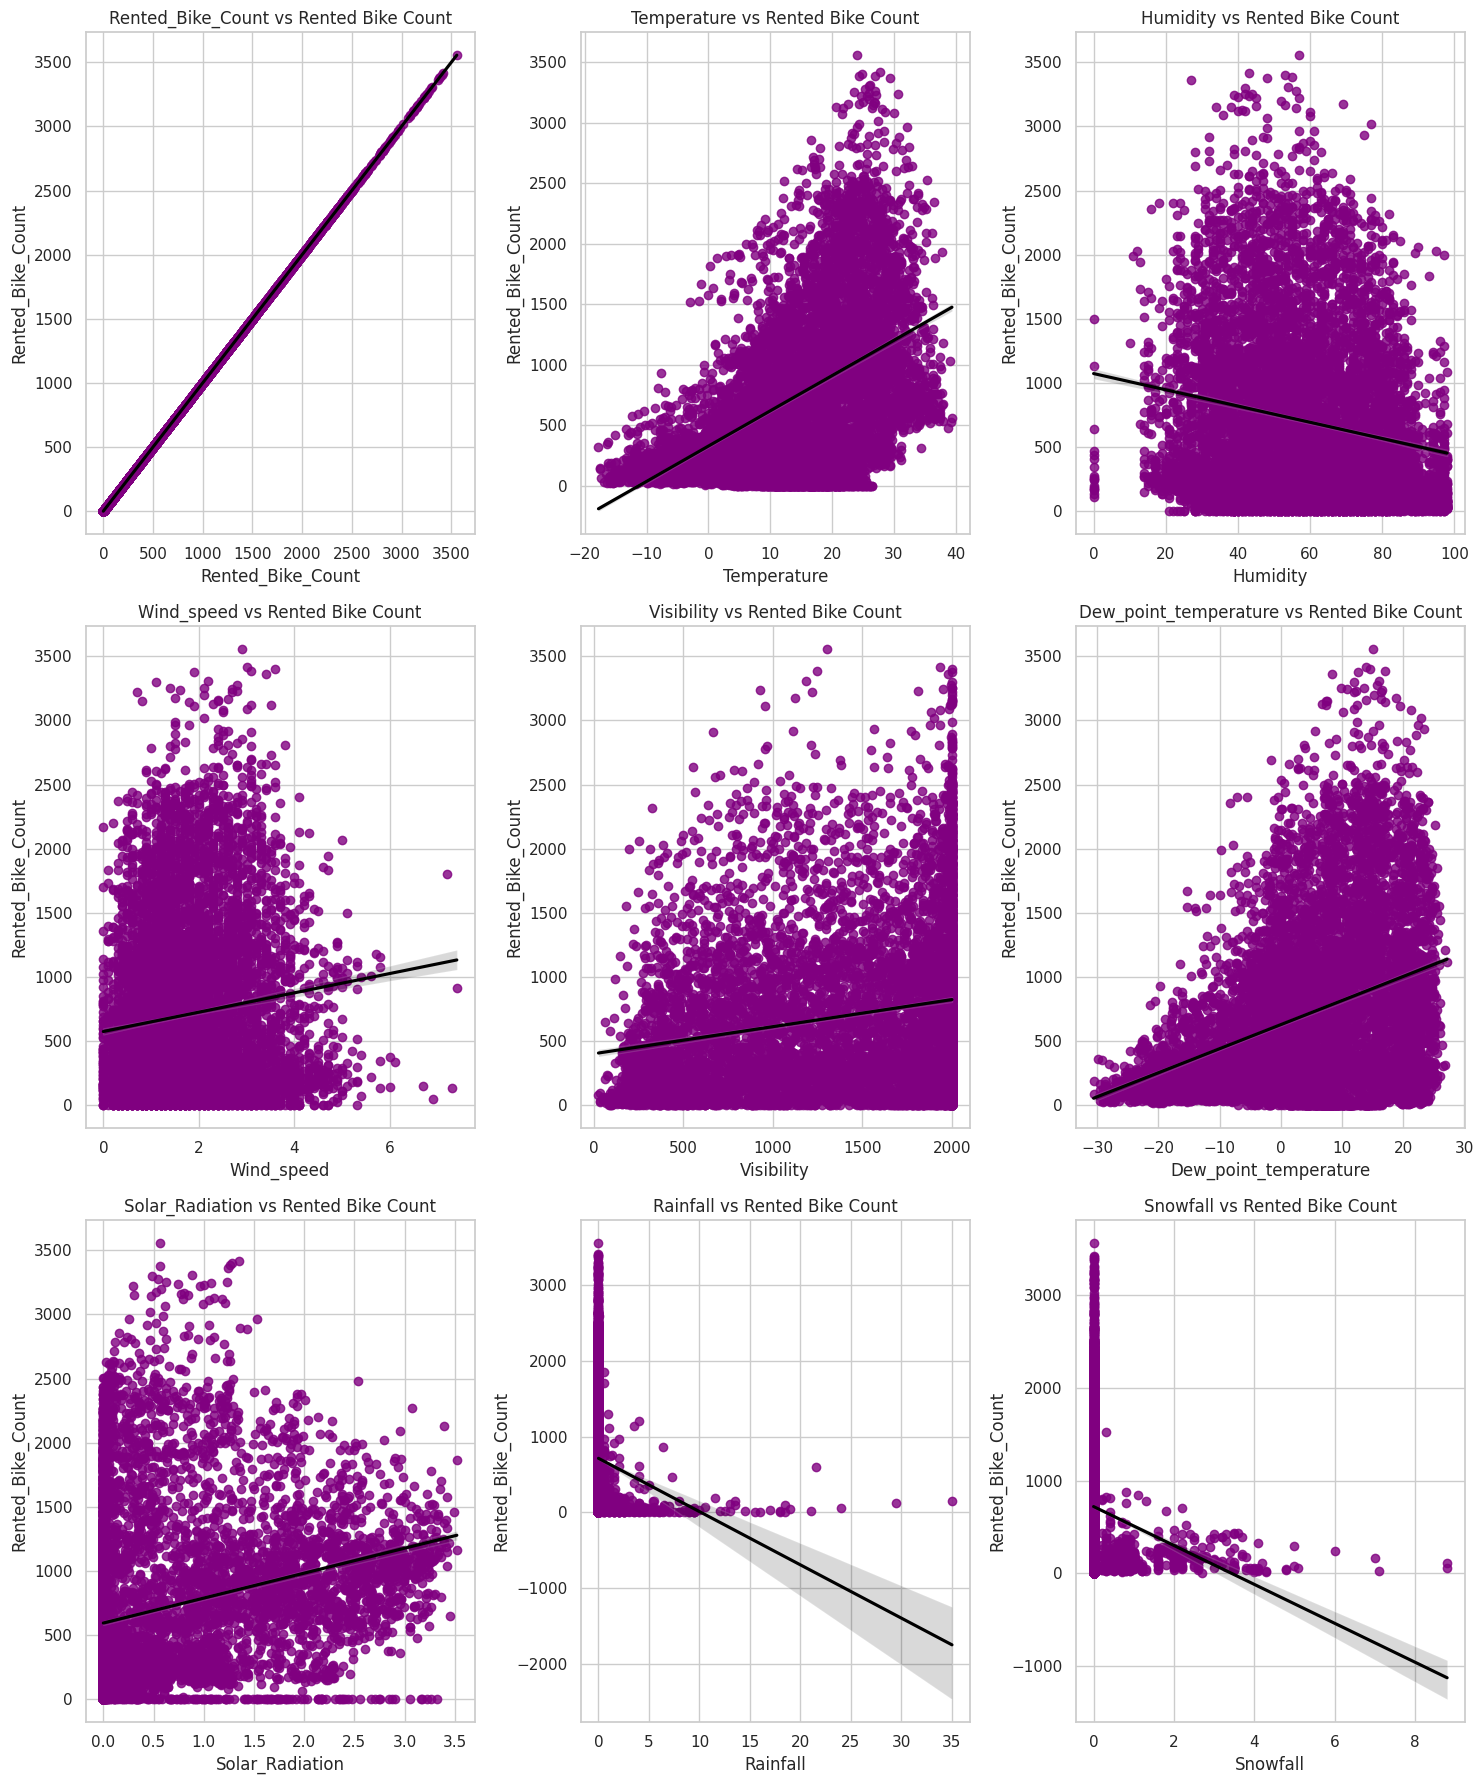

In [ ]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(num_features):
    if i < nrows * ncols:
        sns.regplot(x=bike_df[col], y=bike_df['Rented_Bike_Count'], ax=axes[i],
                    scatter_kws={"color": 'purple'}, line_kws={"color": "black"})
        axes[i].set_title(f'{col} vs Rented Bike Count')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The above regression plots for all the numerical features indicates that :
* 'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature', and 'Solar_Radiation' are positively correlated with the target variable, that is, an increase in these features results in an increase in rented bike count.
* On the other hand, 'Rainfall', 'Snowfall', and 'Humidity' are negatively correlated with the target variable, indicating that an increase in these features results in a decrease in rented bike count.***

Normalise Rented_Bike_Count column data**

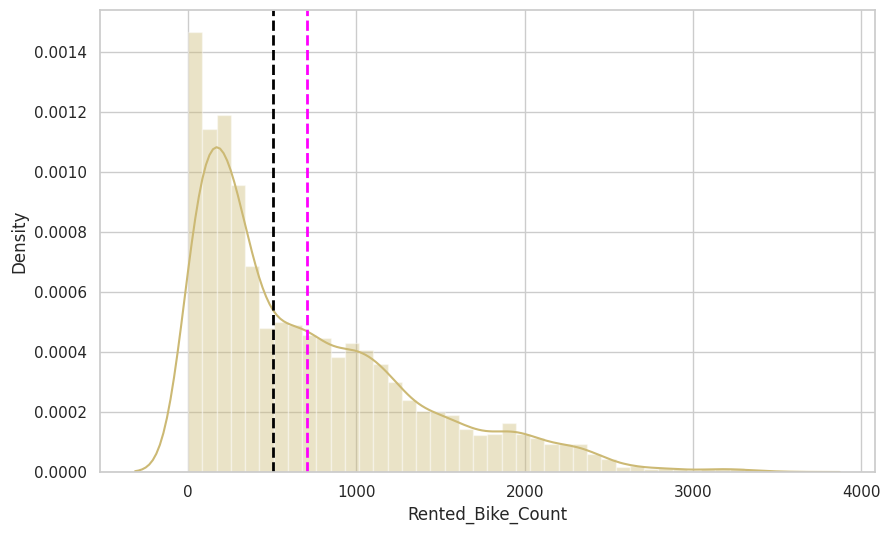

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* Based on the graph above, it can be observed that the Rented Bike Count has a moderately skewed distribution towards the right.
* However, since the assumption for linear regression is that the dependent variable's distribution should be normal, we need to apply some transformations to achieve normality.

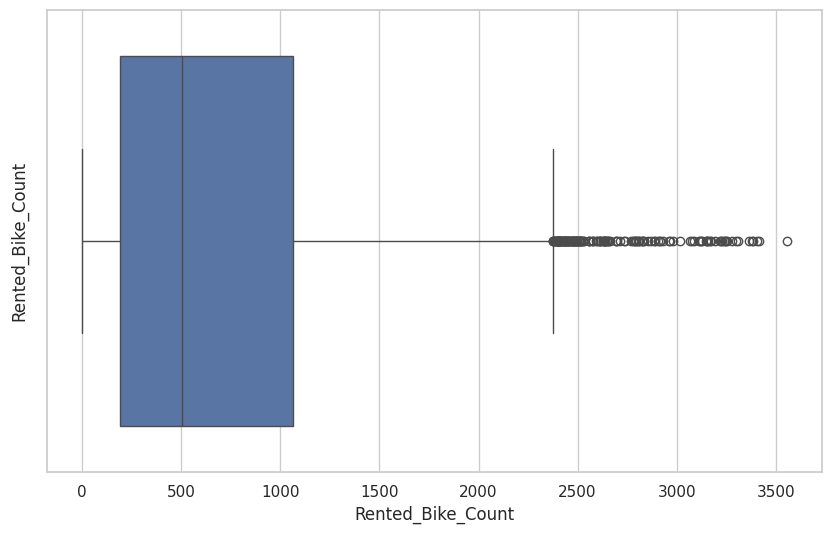

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

* The above boxplot shows that we have detect outliers in Rented Bike Count column

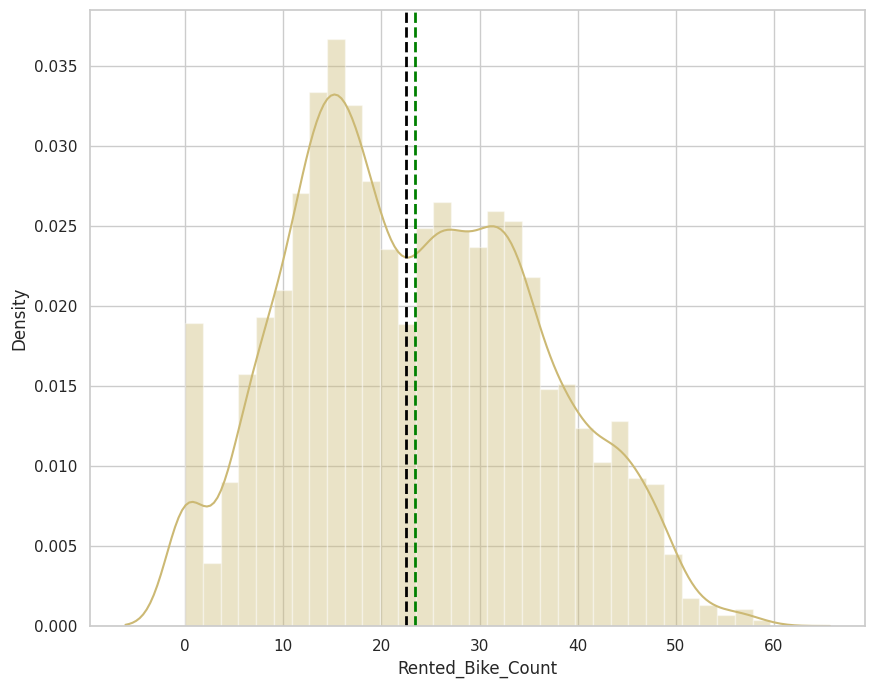

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Applying the generic rule of taking the square root of skewed variables to normalize them, we can observe that the Rented Bike Count, which was previously skewed, now follows a nearly normal distribution.***

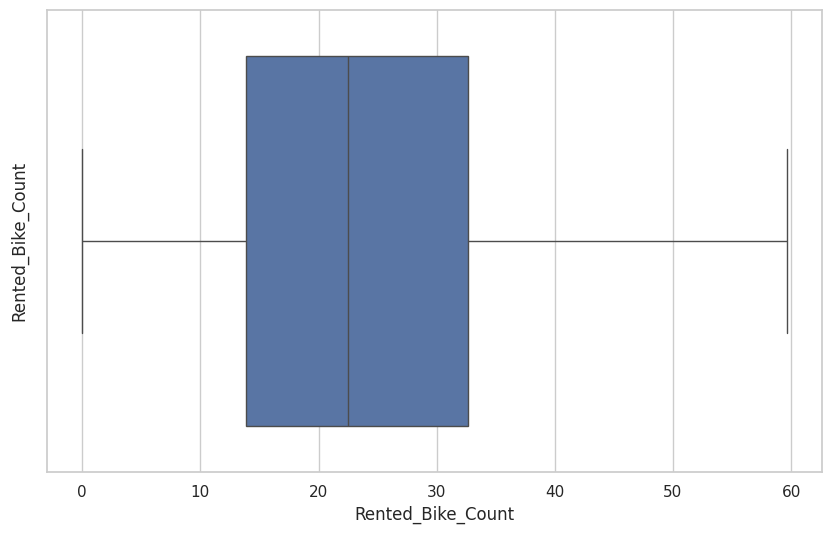

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

# Answer B :

#Visualizations

#### 1. Histograms

Histograms and KDEs were plotted for each numerical feature to assess their distributions:

- **Rented_Bike_Count**: Displays a right-skewed distribution with a peak at lower rental counts and long tails extending to higher counts.
- **Temperature**: Distribution appears approximately normal with some outliers, indicating variability in temperature conditions.
- **Humidity**: Uniform distribution, indicating consistent humidity levels across days.
- **Wind Speed**: Low values dominate, with a few higher readings.
- **Solar Radiation**: Highly variable, indicating fluctuations in sunny conditions.
- **Rainfall**: Majority of days have low to zero rainfall.
- **Snowfall**: Similar to rainfall, mostly zero values with occasional peaks.

#### 2. Regression and Scatter Plots

The regression plots illustrated the relationships between numerical features and the count of rented bikes:

- **Positive Correlations**:
  - **Temperature**, **Wind Speed**, **Visibility**, **Dew Point Temperature**, and **Solar Radiation** show a positive relationship with bike rentals, suggesting higher rentals with favorable conditions.
  
- **Negative Correlations**:
  - **Rainfall**, **Snowfall**, and **Humidity** show a negative correlation with bike rentals, indicating that increased precipitation and humidity levels likely deter bike use.

### 3. Notable Traits for Key Attributes

- **Demand Patterns**: Demand for rented bikes peaks during warmer months (May to October) and is highest during working hours (7 AM - 9 AM and 5 PM - 7 PM). The demand is significantly higher on weekdays compared to weekends.
  
- **Seasonal Variation**: The analysis indicates that summer leads to peak rentals, while winter, especially with snowfall, shows a significant drop in usage.

- **Temperature Preferences**: Optimal temperature for bike rentals appears to be around 25°C, and the presence of solar radiation positively impacts the count.

- **Rainfall and Snowfall Impact**: Despite heavy rainfall, bike rentals do not decrease significantly, though snowfall above 4 cm results in a substantial drop in rentals.

- **Wind Speed and Humidity**: Rentals remain fairly stable across varying wind speeds, but there's a slight increase in rentals at wind speeds of 7 m/s. Similar observations apply to humidity.

### 4. Attributes Requiring Special Treatment

- **Rented_Bike_Count**:
  - The right-skewed distribution necessitates normalization to satisfy the assumptions of linear regression. A square root transformation was applied, which yielded a nearly normal distribution and eliminated outliers.

- **Temperature, Solar Radiation, Wind Speed**:
  - These attributes show positive correlations with bike rentals and may not require transformations but could be monitored for outliers.

- **Rainfall and Snowfall**:
  - With many zero values, it may be beneficial to create binary indicators (e.g., rain or no rain) to model their effects on bike rentals more effectively.

- **Humidity**:
  - Given its negative correlation with bike rentals, we may consider analyzing humidity levels further to determine if they should be treated categorically.

# C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

##**Checking of Correlation between variables**

* Checking in OLS Model

In [ ]:
import statsmodels.api as sm

X = bike_df[[ 'Temperature','Humidity', 'Wind_speed', 'Visibility','Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']

bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0  
3  No Holiday             Yes    12                0  
4  No Holiday             Yes    12                0

In [ ]:
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [ ]:
# Fitting a OLS model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:01:23   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The R square and Adjacent Square values are close to each other, indicating that the model is explaining about 40% of the variance in Rented Bike Count. The P value for F statistic is less than 0.05 for a 5% level of significance. However, the P values for Dew Point Temperature and Visibility are quite high, indicating that these variables are not significant.

* The Omnibus test checks the skewness and kurtosis of residuals, and in this case, the Omnibus value is high, indicating that there is skewness in the data. The large condition number, 3.11e+04, suggests that there may be strong multicollinearity or other numerical issues.

* The Durbin-Watson test is used to detect autocorrelation among variables, and in this case, the value is less than 0.5, indicating the presence of positive autocorrelation among the variables.

In [ ]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.036252    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.336683   -0.543090   
Wind_speed               NaN    -0.036252 -0.336683    1.000000    0.171507   
Visibility               NaN     0.034794 -0.543090    0.171507    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.176486   -0.176630   
Solar_Radiation          NaN     0.353505 -0.461919    0.332274    0.149738   
Rainfall                 NaN     0.050282  0.236397   -0.019674   -0.167629   
Snowfall                 NaN    -0.218405  0.108183   -0.003554   -0.121695   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.353505  0.050282   
Humidity                            0.536894        -0.461919  0.236397   
Wind_speed                         -0.176486         0.332274 -0.019674   
Visibility                         -0.176630         0.149738 -0.167629   
Dew_point_temperature               1.000000         0.094381  0.125597   
Solar_Radiation                     0.094381         1.000000 -0.074290   
Rainfall                            0.125597        -0.074290  1.000000   
Snowfall                           -0.150887        -0.072301  0.008500   

                       Snowfall  
const                       NaN  
Temperature           -0.218405  
Humidity               0.108183  
Wind_speed            -0.003554  
Visibility            -0.121695  
Dew_point_temperature -0.150887  
Solar_Radiation       -0.072301  
Rainfall               0.008500  
Snowfall               1.000000

* ***Based on the OLS model, it was found that there is a high correlation between 'Temperature' and 'Dew_point_temperature'. Therefore, one of these variables needs to be dropped. To decide which one to drop, the (P>|t|) values from the above table were checked. It was found that the 'Dew_point_temperature' value is higher, indicating that it is less significant. Therefore, the 'Dew_point_temperature' column was dropped. To make this decision clearer, a heatmap visualization was used in the next step.***

###**Correlation Matrix**

<Axes: >

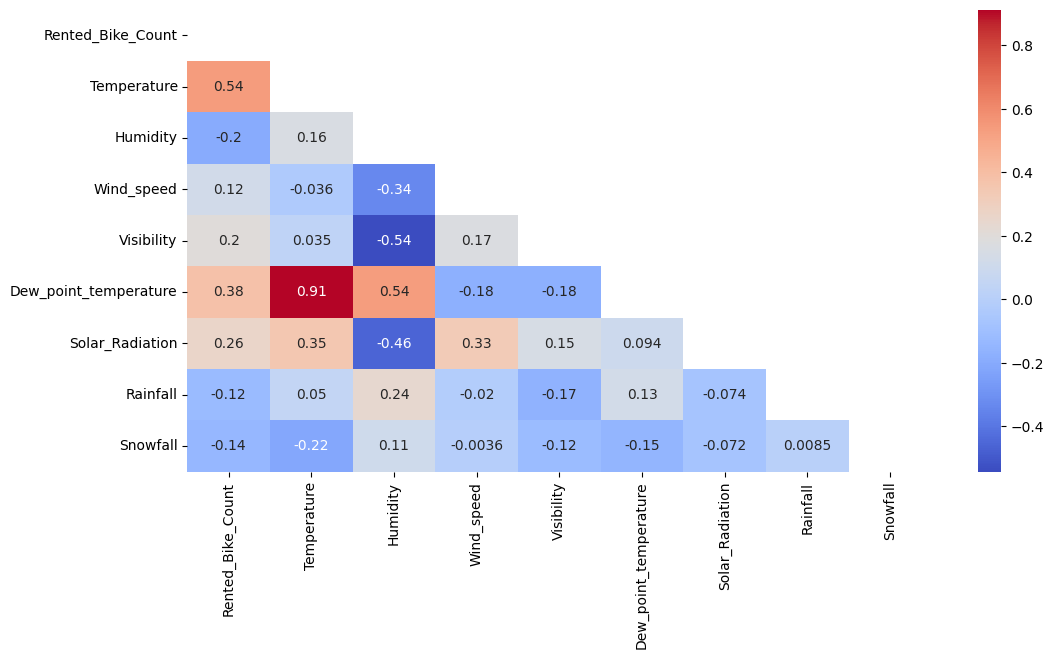

In [ ]:
#Plot the Correlation matrix
plt.figure(figsize=(12,6))
correlation=bike_df.corr(numeric_only = True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall


* ***Based on the correlation heatmap above, we observe that columns 'Temperature' and 'Dew point temperature' are positively correlated, with a correlation coefficient of 0.91. Therefore, dropping the 'Dew point temperature(°C)' column would not significantly affect our analysis since it has similar variations to 'Temperature'.***

In [ ]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


# Answer C:



#### Correlation Matrix

**Key Insights from the Correlation Matrix:**
- **Strong Positive Correlations**:
  - **Rented Bike Count** has a high positive correlation with **Temperature** (0.74) and **Dew Point Temperature** (0.91). This suggests that as temperature increases, so does the number of rented bikes.
  - **Solar Radiation** also has a positive correlation (0.55), indicating that higher solar radiation levels correlate with increased bike rentals.

- **Strong Negative Correlations**:
  - **Humidity** exhibits a negative correlation (-0.29) with bike rentals, suggesting that increased humidity levels could deter people from renting bikes.
  - Both **Rainfall** and **Snowfall** show no significant impact on bike rentals, as indicated by their correlation coefficients close to zero.

### Scatter Plots - We ploted them earlier

We already plotted the scatter plots earlier and had summarized them in Q2, however, pointing the results here again:

- **Temperature vs. Rented Bike Count**: Shows a positive linear trend, indicating that higher temperatures are associated with an increase in bike rentals.
  
- **Dew Point Temperature vs. Rented Bike Count**: Also displays a positive relationship, reinforcing the correlation found previously.
  
- **Solar Radiation vs. Rented Bike Count**: Indicates an increase in bike rentals with higher solar radiation.

- **Humidity vs. Rented Bike Count**: Demonstrates a slight negative trend, suggesting that higher humidity may decrease bike rentals.

### 4. Regression Analysis Insights

From the regression analysis:
- The R-squared and Adjusted R-squared values indicate that the model explains approximately 40% of the variance in Rented Bike Count.
- The P-value for the F-statistic is less than 0.05, validating the significance of the model overall.
- However, P-values for **Dew Point Temperature** and **Visibility** are high, indicating these variables do not contribute significantly to the model.

### 5. Multicollinearity and Variable Reduction

- A high correlation (0.91) between **Temperature** and **Dew Point Temperature** indicates multicollinearity. To avoid redundancy, **Dew Point Temperature** was dropped due to its higher P-value, simplifying the model while retaining its predictive power.

### 6. Statistical Tests

- **Omnibus Test**: Indicates skewness and kurtosis in residuals, signaling potential issues in the data distribution.
- **Durbin-Watson Test**: The value is less than 0.5, suggesting positive autocorrelation, which may affect the validity of the regression model.

## ***Feature Engineering & Data Pre-processing***

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [ ]:
#Assign all categorical features to a variable
cat_features=list(bike_df.select_dtypes(['object','category']).columns)
cat_features=pd.Index(cat_features)
cat_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

**One-hot encoding enables a more descriptive representation of categorical data. Since many machine learning algorithms do not accept categorical data as input or output variables, the categories need to be converted into numerical values.**

In [ ]:
#create a copy
#bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in cat_features:
    bike_df = one_hot_encoding(bike_df, col)
bike_df.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0   False   False  ...    False    False   
1              0.0       0.0       0.0    True   False  ...    False    False   
2              0.0       0.0       0.0   False    True  ...    False    False   
3              0.0       0.0       0.0   False   False  ...    False    False   
4              0.0       0.0       0.0   False   False  ...    False    False   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0    False    False    False    False     False     False      True   
1    False    False    False    False     False     False      True   
2    False    False    False    False     False     False      True   
3    False    False    False    False     False     False      True   
4    False    False    False    False     False     False      True   

   weekdays_weekend_1  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 48 columns]

#**Model Training**

# D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

##**Train Test split for regression**

In [ ]:
bool_columns = bike_df.select_dtypes(include=['bool']).columns
bike_df[bool_columns] = bike_df[bool_columns].astype(int)

In [ ]:
#Assign the value in X and Y
X = bike_df.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df['Rented_Bike_Count'])

In [ ]:
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 47 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
X_test.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
4059         10.7        73         1.3        2000             0.00   
6914         21.7        78         1.0        2000             0.00   
233           3.6        65         4.3        1061             0.03   
982          -9.7        51         2.8        2000             0.00   
5967         33.6        58         3.6        1448             1.98   

      Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  \
4059       0.0       0.0       0       0       1  ...        0        1   
6914       0.0       0.0       0       1       0  ...        0        0   
233        0.0       0.4       0       0       0  ...        0        0   
982        0.0       0.0       0       0       0  ...        0        0   
5967       0.0       0.0       0       0       0  ...        0        0   

      month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
4059        0        0        0        0         0         0         0   
6914        0        0        0        1         0         0         0   
233         0        0        0        0         0         0         1   
982         0        0        0        0         0         0         0   
5967        0        0        1        0         0         0         0   

      weekdays_weekend_1  
4059                   1  
6914                   1  
233                    1  
982                    0  
5967                   0  

[5 rows x 47 columns]

In [ ]:
# Statistical summary for training and test sets
print("Training set summary:")
print(X_train.describe())

print("Test set summary:")
print(X_test.describe())


Training set summary:
       Temperature     Humidity   Wind_speed   Visibility  Solar_Radiation  \
count  6570.000000  6570.000000  6570.000000  6570.000000      6570.000000   
mean     12.781903    58.027549     1.723592  1439.278995         0.572391   
std      11.984021    20.354358     1.038850   608.396154         0.873292   
min     -17.500000     0.000000     0.000000    33.000000         0.000000   
25%       3.100000    42.000000     0.900000   950.000000         0.000000   
50%      13.500000    57.000000     1.500000  1703.000000         0.010000   
75%      22.500000    74.000000     2.300000  2000.000000         0.940000   
max      39.300000    98.000000     7.400000  2000.000000         3.520000   

          Rainfall     Snowfall       Hour_1       Hour_2       Hour_3  ...  \
count  6570.000000  6570.000000  6570.000000  6570.000000  6570.000000  ...   
mean      0.146393     0.074855     0.042161     0.043988     0.041553  ...   
std       1.159849     0.433473     0.

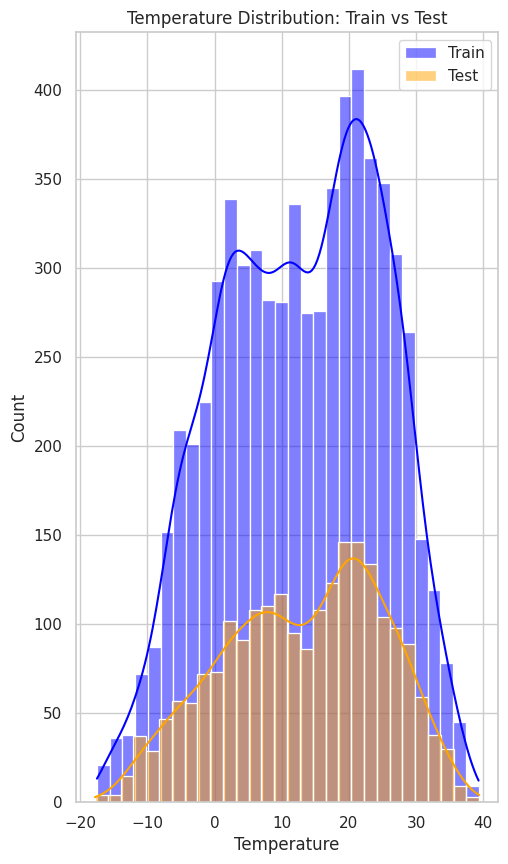

In [ ]:
# Comparing the distribution of a feature
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.histplot(X_train['Temperature'], bins=30, kde=True, color='blue', label='Train', alpha=0.5)
sns.histplot(X_test['Temperature'], bins=30, kde=True, color='orange', label='Test', alpha=0.5)
plt.title('Temperature Distribution: Train vs Test')
plt.legend()


#Answer D: Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

#Description of Data Splitting
We selected 25% of the dataset for testing purposes to evaluate the model's performance. The process involved the following steps:

1. Defining Features and Target Variable:

* We separated the dataset into features (independent variables) and the target variable (dependent variable).
* The features were defined as all columns except for Rented_Bike_Count, which we dropped using the drop method.
* The target variable, Rented_Bike_Count, was transformed using a square root transformation to stabilize its variance.

2. Splitting the Data:

* We utilized the train_test_split function from the sklearn.model_selection module to split the data.
* In this case, we set test_size=0.25, meaning that 25% of the data was allocated to the test set while the remaining 75% constituted the training set. The random_state=0 parameter ensures reproducibility of the split.
* We confirmed that the training set contained **6570** samples, and the testing set contained **2190** samples.

3. Verification:

* We compared the statistical summaries (mean, median, standard deviation, etc.) of key features in both the training and testing datasets, which were found similar
* Visualizing the distribution of one key feature - "Temperature" (using histogram) for both training and testing sets further validated that they share similar characteristics.


# **ML Model Implementation**

# E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

# **LINEAR REGRESSION**

In [ ]:
X_train.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
8639          3.8        83         1.1         390             0.00   
3614         24.0        47         2.3         520             2.87   
1387         -7.1        33         2.0        1887             0.00   
3900         12.3        97         0.8         238             0.14   
8044          3.6        70         0.8        1934             0.00   

      Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  \
8639       0.0       0.4       0       0       0  ...        0        0   
3614       0.0       0.0       0       0       0  ...        1        0   
1387       0.0       0.0       0       0       0  ...        0        0   
3900       2.0       0.0       0       0       0  ...        0        1   
8044       0.0       0.0       0       0       0  ...        0        0   

      month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
8639        0        0        0        0         0         1         0   
3614        0        0        0        0         0         0         0   
1387        0        0        0        0         0         0         0   
3900        0        0        0        0         0         0         0   
8044        0        0        0        0         0         1         0   

      weekdays_weekend_1  
8639                   1  
3614                   0  
1387                   1  
3900                   1  
8044                   0  

[5 rows x 47 columns]

In [ ]:
#Functions for : Linear Regression (normal equation), SGD, K-fold validation, Regularizations, Graph Plotting

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler


# Normal Equation with Cross-Validation
def normal_equation_cross_validate(X, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []
    y_preds_all = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Add intercept term
        X_train_fold = np.c_[np.ones((X_train_fold.shape[0], 1)), X_train_fold]
        X_val_fold = np.c_[np.ones((X_val_fold.shape[0], 1)), X_val_fold]

        # Compute theta using Normal Equation
        theta = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
        y_pred = X_val_fold.dot(theta)
        y_preds_all.append(y_pred)

        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        rmse_scores.append(rmse)

    print(f"\nCross-validated RMSE (Normal Equation): {np.mean(rmse_scores):.4f}")

    plot_actual_vs_predicted(y, np.concatenate(y_preds_all))
    return np.mean(rmse_scores)

def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(y_true, y_pred, c=np.abs(y_true - y_pred), cmap='viridis', alpha=0.7, edgecolor='w', s=100)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Absolute Error', fontsize=12)

    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title('Actual vs Predicted Values (Normal Equation)', fontsize=18, fontweight='bold')

    plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
    plt.legend(fontsize=12)

    plt.xlim([min_val - 1, max_val + 1])
    plt.ylim([min_val - 1, max_val + 1])
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')

    plt.show()


# 2. SGD Class with Cross-Validation
class SGD:
    def __init__(self, lr=0.001, epochs=500, batch_size=32, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def gradient(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        error = y_pred - y_batch
        gradient_weights = np.dot(X_batch.T, error) / X_batch.shape[0]
        gradient_bias = np.mean(error)
        return gradient_weights, gradient_bias

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

        train_losses = []
        val_losses = []

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                self.weights -= self.learning_rate * gradient_weights
                self.bias -= self.learning_rate * gradient_bias

            train_loss = self.mean_squared_error(y, self.predict(X))
            train_losses.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self.mean_squared_error(y_val, self.predict(X_val))
                val_losses.append(val_loss)

            if epoch % 100 == 0:
                if val_losses:
                    print(f"Epoch {epoch}: Training Loss {train_loss:.4f}, Validation Loss {val_losses[-1]:.4f}")
                else:
                    print(f"Epoch {epoch}: Training Loss {train_loss:.4f}")

            if np.linalg.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break

        return self.weights, self.bias, train_losses, val_losses

# SGD with Cross-Validation
def sgd_cross_validate(X, y, lr, batch_size, n_splits=3, epochs=500):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []
    fold_number = 1

    for train_index, val_index in kf.split(X):
        print("\nCross Validation Fold: ", fold_number)
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        sgd_model = SGD(lr=lr, epochs=epochs, batch_size=batch_size)
        weights, bias, train_losses, val_losses = sgd_model.fit(X_train_fold, y_train_fold, X_val=X_val_fold, y_val=y_val_fold)

        y_pred = sgd_model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        rmse_scores.append(rmse)

        fold_number+=1

    print(f"\nCross-validated RMSE (SGD - lr={lr}, batch_size={batch_size}): {np.mean(rmse_scores):.4f}")
    return np.mean(rmse_scores)

# Regularization Cross-Validation for Ridge, Lasso, and ElasticNet with RMSE collection
def regularization_cross_validate(X, y, method, alpha, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        if method == 'ridge':
            model = Ridge(alpha=alpha)
        elif method == 'lasso':
            model = Lasso(alpha=alpha)
        elif method == 'elasticnet':
            model = ElasticNet(alpha=alpha)

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        rmse_scores.append(rmse)

    print(f"{method.capitalize()} Regularization (alpha={alpha}): RMSE={np.mean(rmse_scores):.4f}")
    return np.mean(rmse_scores)

# 3. Regularization Exploration for different alphas
def explore_regularization(X, y, method, alphas):
    rmse_scores = []
    for alpha in alphas:
        rmse = regularization_cross_validate(X, y, method, alpha)
        rmse_scores.append(rmse)
    plot_regularization_effect(alphas, rmse_scores, method)

def plot_regularization_effect(alphas, rmse_scores, method):
    plt.figure(figsize=(6, 6))

    plt.plot(alphas, rmse_scores, marker='o', markersize=8, linestyle='-', color='dodgerblue', linewidth=2, label='RMSE')

    plt.xscale('log')
    plt.xticks(alphas, [f"{alpha:.1f}" for alpha in alphas])  # Custom tick labels for clarity

    plt.xlabel('Alpha (log scale)', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.title(f'RMSE vs Alpha for {method.capitalize()} Regularization', fontsize=18, fontweight='bold')

    plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

    plt.legend(fontsize=12)

    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()


# 4. Hyperparameter exploration for SGD
def explore_sgd_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, batch_sizes):
    train_losses_all = []
    val_losses_all = []

    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"\nExploring SGD Hyperparameters: Learning Rate={lr}, Batch Size={batch_size}")
            sgd_cross_validate(np.array(X_train), np.array(y_train), lr=lr, batch_size=batch_size)
            # Train and collect losses to plot later if needed
            sgd_model = SGD(lr=lr, epochs=500, batch_size=batch_size)
            weights, biases, train_losses, val_losses = sgd_model.fit(np.array(X_train), np.array(y_train), X_val=np.array(X_test), y_val=np.array(y_test))
            train_losses_all.append(train_losses)
            val_losses_all.append(val_losses)
    return train_losses_all, val_losses_all

def kfoldvalidation(degree):
  sgd = SGDRegressor().fit(X_train, y_train)
  scores = cross_val_score(sgd, X_train, y_train, cv=degree)
  print("Linear Regression - Cross validation scores:", scores)
  print("Linear Regression - Mean cross-validation score:\n", np.mean(scores))

  train_sizes, train_scores, test_scores = learning_curve(sgd, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
  train_scores_mean = -train_scores.mean(axis = 1)
  test_scores_mean = -test_scores.mean(axis = 1)

  plt.plot(train_sizes, train_scores_mean, label = 'Training error')
  plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
  plt.legend()
  plt.xlabel("Training Examples")
  plt.ylabel("Mean Squared Error")
  plt.title("Learning Curves")
  plt.show()

# Plot training and validation loss for different hyperparameters
def plot_losses(train_losses_all, val_losses_all, learning_rates, batch_sizes):
    figures_per_row = len(batch_sizes)
    figures_per_col = len(learning_rates)

    figs, ax1 = plt.subplots(figures_per_col, figures_per_row, figsize=(15, 5 * figures_per_col))

    if figures_per_row == 1 and figures_per_col == 1:
        ax1 = [ax1]
    elif figures_per_row == 1 or figures_per_col == 1:
        ax1 = ax1.flatten()
    else:
        ax1 = ax1.ravel()

    for i, (lr, batch_size) in enumerate([(lr, batch_size) for lr in learning_rates for batch_size in batch_sizes]):
        ax = ax1[i]
        ax.plot(train_losses_all[i], label='Training Loss', color='blue')
        ax.plot(val_losses_all[i], label='Validation Loss', color='orange')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.set_title(f'Learning Rate={lr}, Batch Size={batch_size}', fontsize=12, fontweight='bold')
        ax.legend()

    plt.suptitle('Training and Validation Loss Across Hyperparameters', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure that X and y are numpy arrays
X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)



### Above, we have defined functions for all the tasks together so that we can look at the results one by one easily. This includes: Linear Regression (normal form), k-fold validations, SGD, Regularizations and graph plotting helper functions


Cross-validated RMSE (Normal Equation): 6.0626


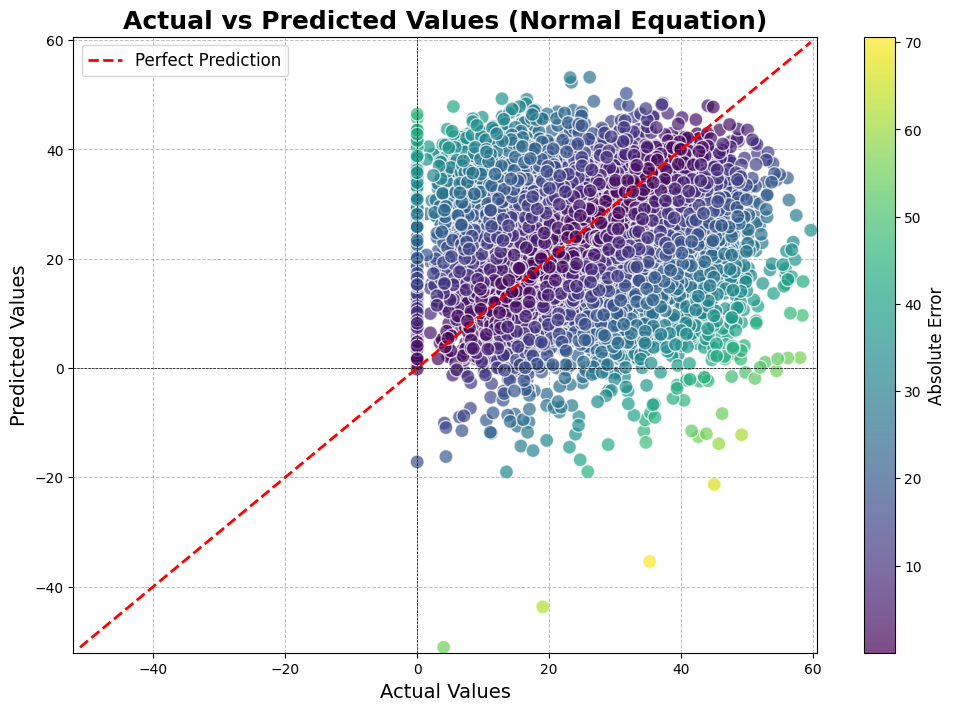

6.062637274249123

In [ ]:
# 1. Train with Normal Equation

normal_equation_cross_validate(X_train_np, y_train_np)

Linear Regression - Cross validation scores: [-2.12790728e+27 -4.26591760e+26 -1.30663122e+25]
Linear Regression - Mean cross-validation score:
 -8.558551179613282e+26


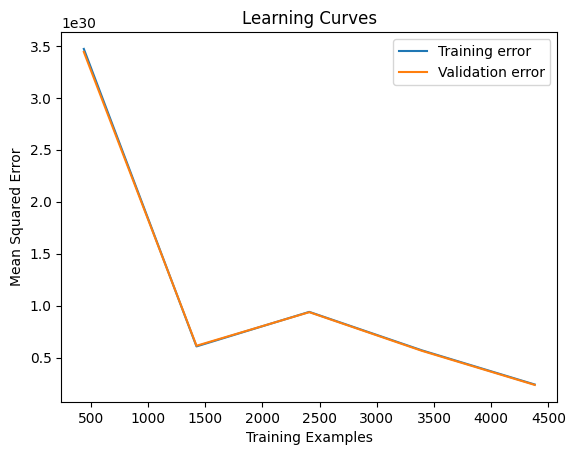

In [ ]:
# 2. k-fold validation for Linear Regression

kfoldvalidation(3)

In [ ]:
# 3. Training SGD model (normal equation), along with k-fold validation

train_losses_all, val_losses_all = explore_sgd_hyperparameters(X_train_scaled, y_train, X_test_scaled, y_test, [0.1], [25])


Exploring SGD Hyperparameters: Learning Rate=0.1, Batch Size=25

Cross Validation Fold:  1
Epoch 0: Training Loss 42.9702, Validation Loss 42.4329
Epoch 100: Training Loss 40.2994, Validation Loss 39.1255
Epoch 200: Training Loss 39.0192, Validation Loss 39.1416
Epoch 300: Training Loss 42.9205, Validation Loss 42.7085
Epoch 400: Training Loss 51.7674, Validation Loss 49.5485

Cross Validation Fold:  2
Epoch 0: Training Loss 84.8200, Validation Loss 75.5762
Epoch 100: Training Loss 41.3554, Validation Loss 41.9524
Epoch 200: Training Loss 43.9622, Validation Loss 43.9610
Epoch 300: Training Loss 46.4754, Validation Loss 47.7609
Epoch 400: Training Loss 49.8099, Validation Loss 48.6134

Cross Validation Fold:  3
Epoch 0: Training Loss 38.9204, Validation Loss 46.5891
Epoch 100: Training Loss 41.0861, Validation Loss 46.8966
Epoch 200: Training Loss 48.9111, Validation Loss 58.3476
Epoch 300: Training Loss 38.3313, Validation Loss 39.2568
Epoch 400: Training Loss 40.2368, Validation Los

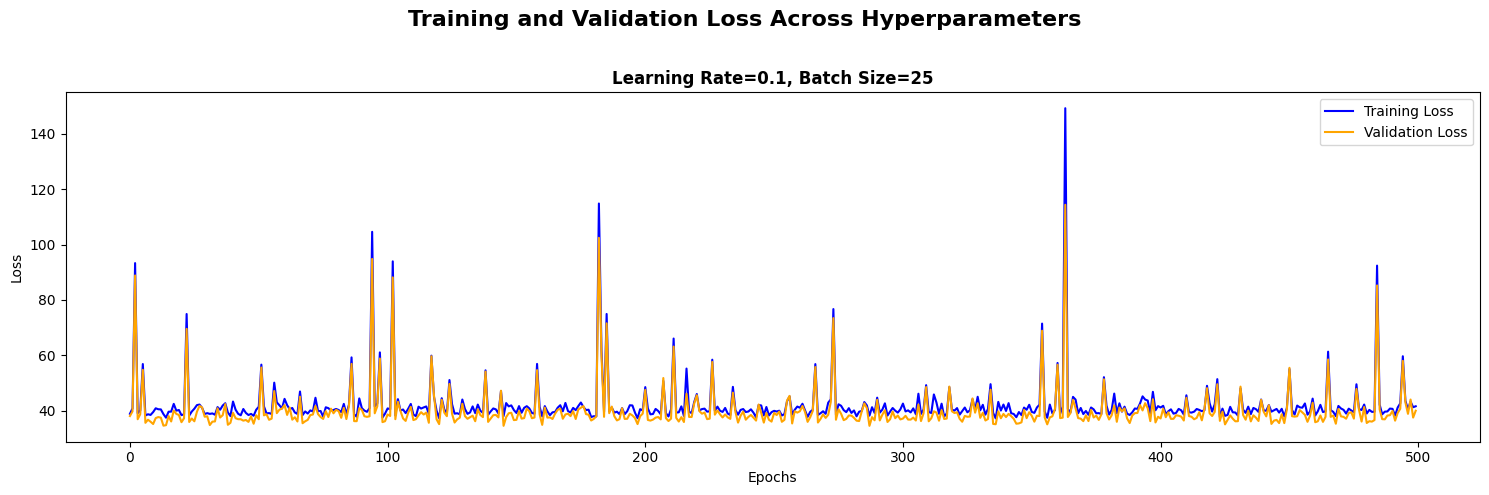

In [ ]:
# Plotting training and validation loss for SGD

plot_losses(train_losses_all, val_losses_all, [0.1], [25])

In [ ]:
# 4. Exploring how SGD behaves with different hyperparameters: learning rates and batch_sizes

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
train_losses_all, val_losses_all = explore_sgd_hyperparameters(X_train_scaled, y_train, X_test_scaled, y_test, learning_rates, batch_sizes)


Exploring SGD Hyperparameters: Learning Rate=0.001, Batch Size=16

Cross Validation Fold:  1
Epoch 0: Training Loss 403.8526, Validation Loss 410.7151
Epoch 100: Training Loss 35.4259, Validation Loss 35.1928
Epoch 200: Training Loss 35.3985, Validation Loss 35.1839
Epoch 300: Training Loss 35.3967, Validation Loss 35.1611
Epoch 400: Training Loss 35.3962, Validation Loss 35.1711

Cross Validation Fold:  2
Epoch 0: Training Loss 404.5804, Validation Loss 405.8894
Epoch 100: Training Loss 35.2028, Validation Loss 35.6768
Epoch 200: Training Loss 35.1674, Validation Loss 35.6671
Epoch 300: Training Loss 35.1659, Validation Loss 35.6776
Epoch 400: Training Loss 35.1652, Validation Loss 35.6630

Cross Validation Fold:  3
Epoch 0: Training Loss 404.8887, Validation Loss 404.4068
Epoch 100: Training Loss 33.7922, Validation Loss 39.5794
Epoch 200: Training Loss 33.7607, Validation Loss 39.5676
Epoch 300: Training Loss 33.7598, Validation Loss 39.5799
Epoch 400: Training Loss 33.7589, Valida

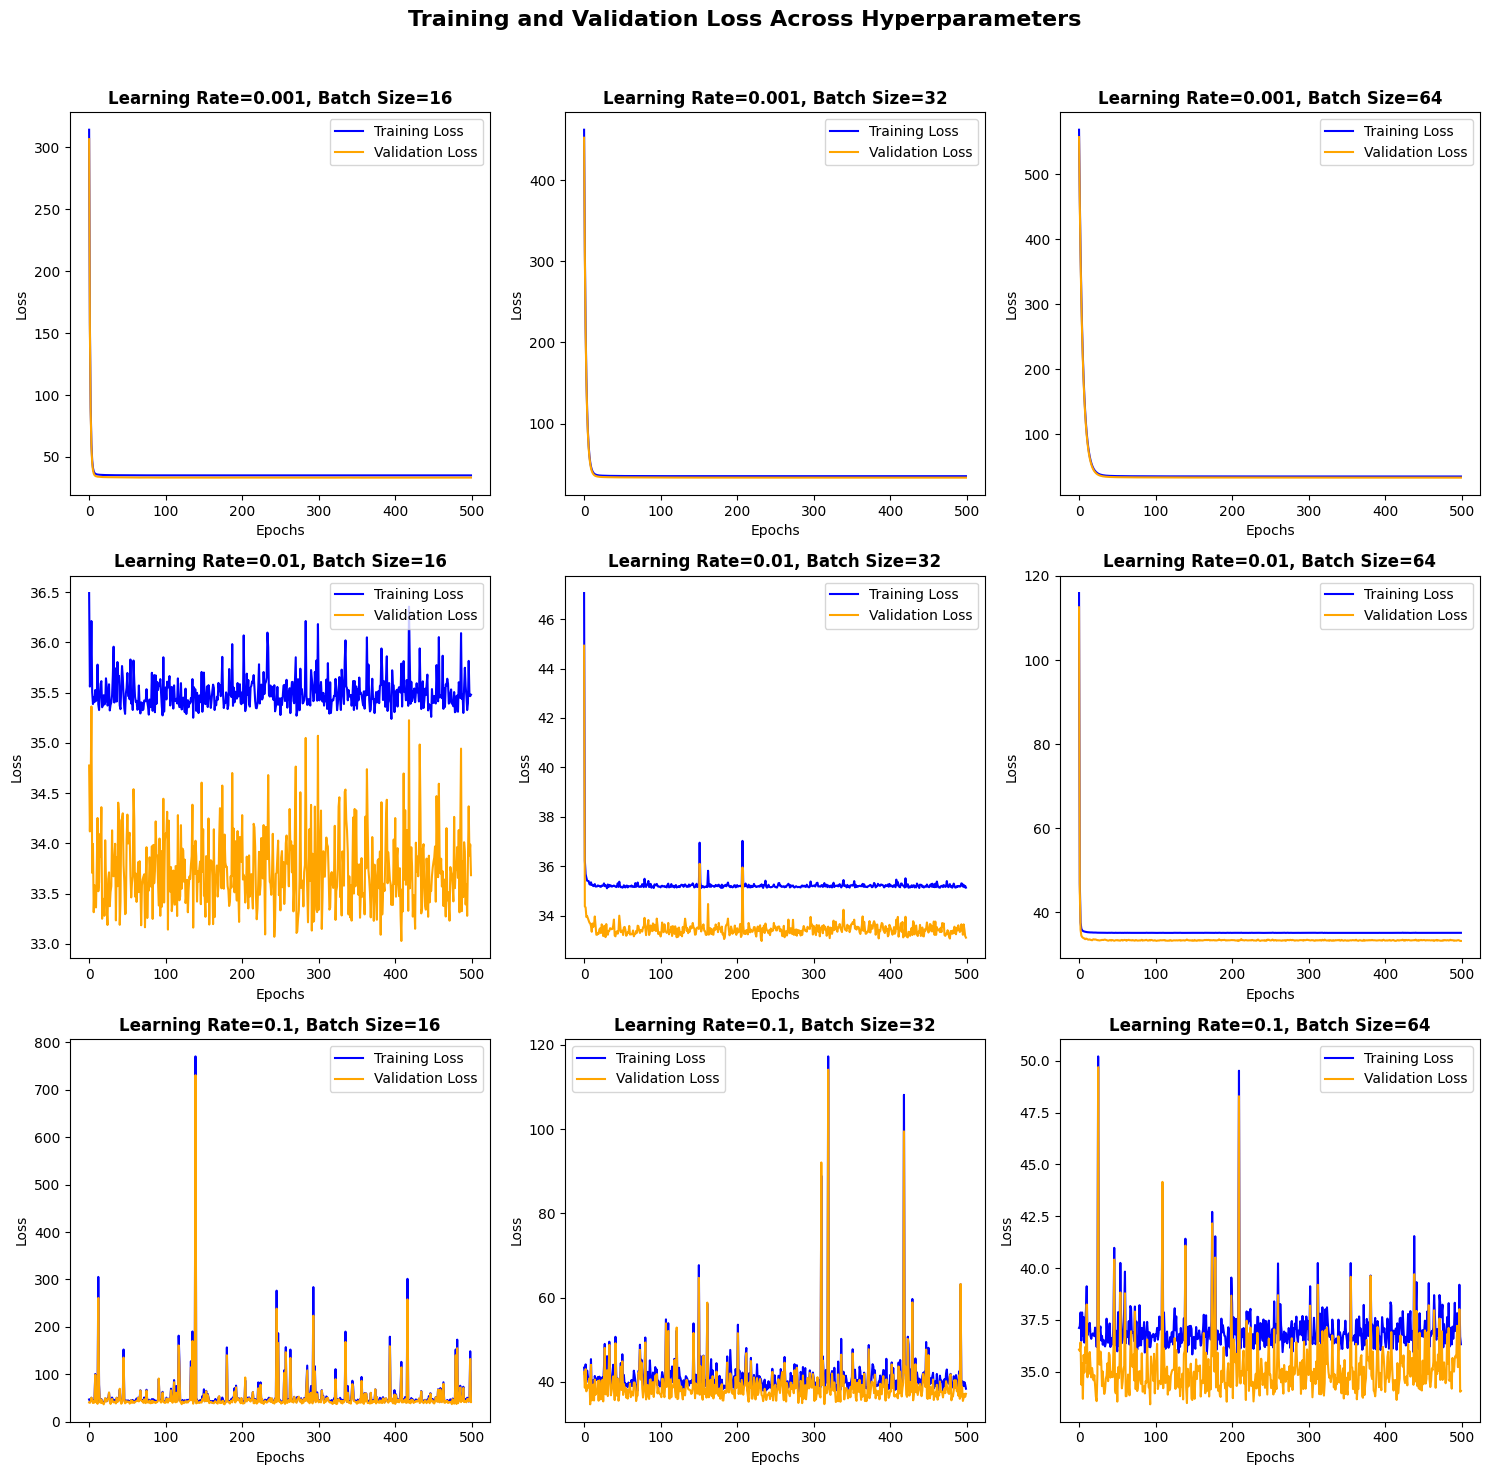

In [ ]:
# 5. Plot training and validation loss for SGD for different hyperparameters
plot_losses(train_losses_all, val_losses_all, learning_rates, batch_sizes)

Ridge Regularization (alpha=0.1): RMSE=6.0626
Ridge Regularization (alpha=1.0): RMSE=6.0626
Ridge Regularization (alpha=10.0): RMSE=6.0620


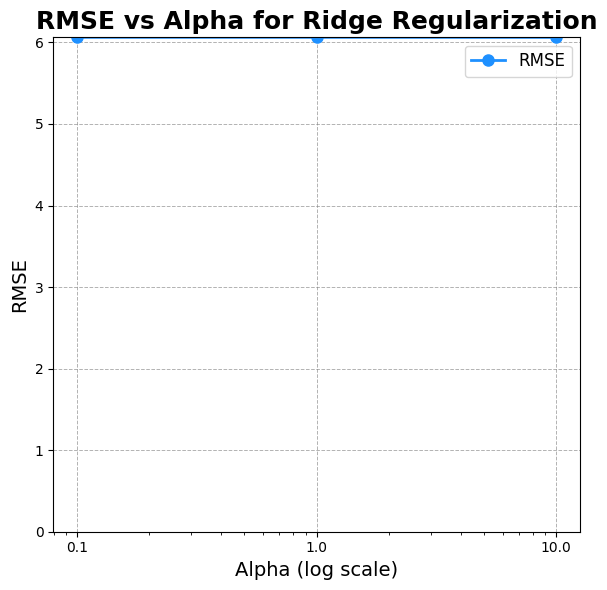

In [ ]:
# 6. Train with Regularization along with exploration with 3 values of penalties
#Ridge
alphas = [0.1, 1.0, 10.0]
explore_regularization(X_train_np, y_train_np, 'ridge', alphas)

Lasso Regularization (alpha=0.1): RMSE=6.1009
Lasso Regularization (alpha=1.0): RMSE=7.5913
Lasso Regularization (alpha=10.0): RMSE=12.4093


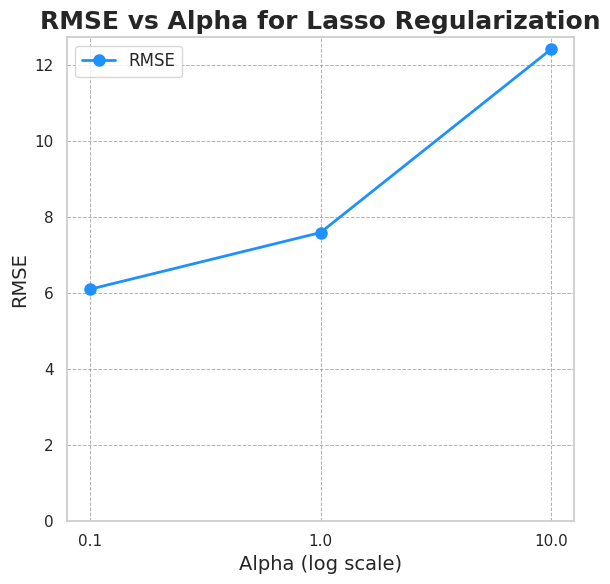

In [ ]:
#Lasso
explore_regularization(X_train_np, y_train_np, 'lasso', alphas)

Elasticnet Regularization (alpha=0.1): RMSE=6.1036
Elasticnet Regularization (alpha=1.0): RMSE=7.6078
Elasticnet Regularization (alpha=10.0): RMSE=12.2416


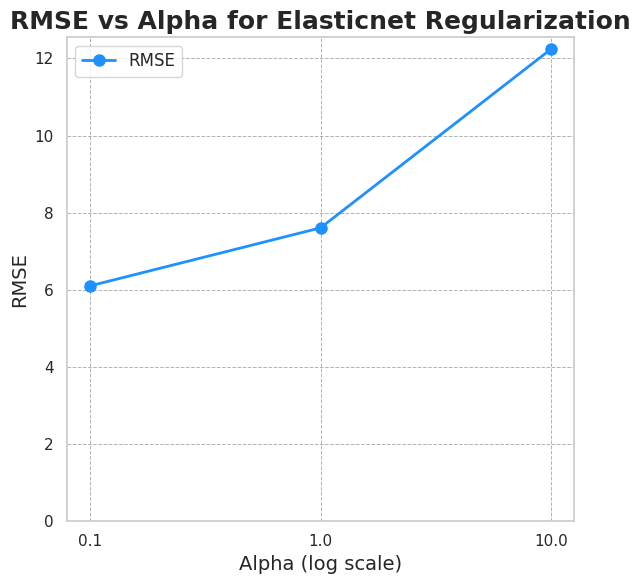

In [ ]:
#ElasticNet
explore_regularization(X_train_np, y_train_np, 'elasticnet', alphas)

###***Choosing the best model for linear regression from above***

Epoch 0: Training Loss 314.0596
Epoch 100: Training Loss 35.0876
Epoch 200: Training Loss 35.0793
Epoch 300: Training Loss 35.0809
Epoch 400: Training Loss 35.0786
Epoch 500: Training Loss 35.0792
Epoch 600: Training Loss 35.0792
Epoch 700: Training Loss 35.0795
Epoch 800: Training Loss 35.0785
Epoch 900: Training Loss 35.0798
Test RMSE: 5.7658
Test MAE: 4.4090
Test R² Score: 0.7895


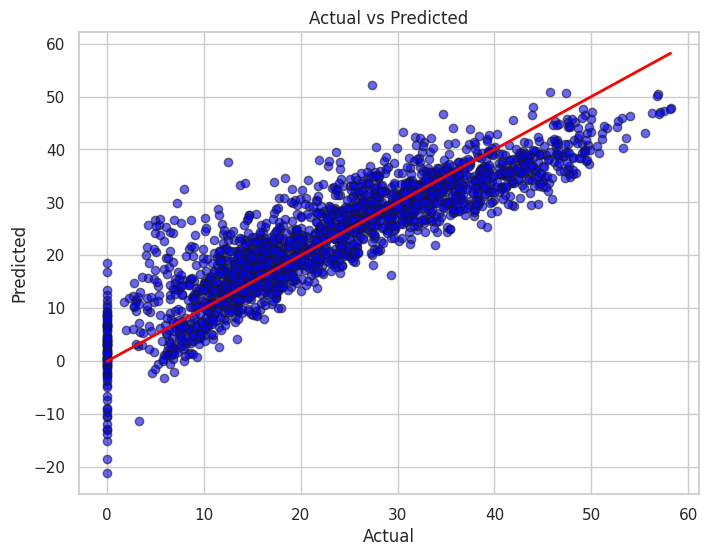

In [ ]:
# Now choosing the best model among the above models and predicting values
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# optimal hyperparameters
optimal_lr = 0.001
optimal_batch_size = 16

# Train the SGD model on the full training set with optimal hyperparameters
sgd_model = SGD(lr=optimal_lr, epochs=1000, batch_size=optimal_batch_size)
sgd_model.fit(np.array(X_train_scaled), np.array(y_train))

# Make predictions on the test set
y_pred = sgd_model.predict(np.array(X_test_scaled))

# Evaluate performance using RMSE, MAE, and R² score
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

# 1. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()



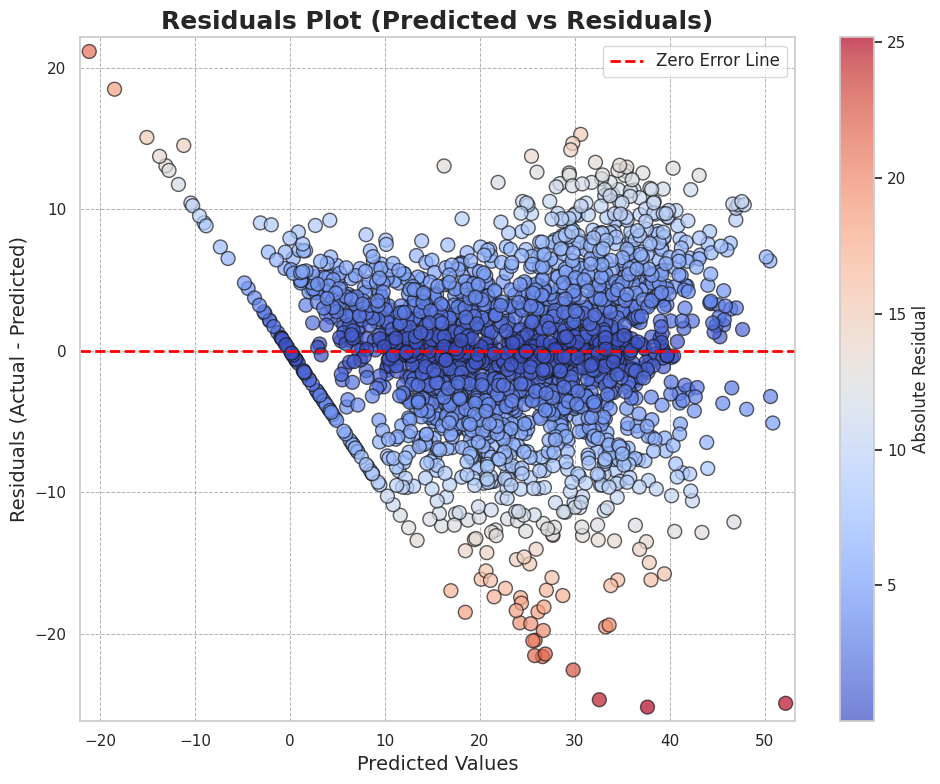

In [ ]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 8))

    scatter = plt.scatter(y_pred, residuals, c=np.abs(residuals), cmap='coolwarm', alpha=0.7, edgecolor='k', s=100)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Absolute Residual', fontsize=12)

    plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

    plt.title('Residuals Plot (Predicted vs Residuals)', fontsize=18, fontweight='bold')
    plt.xlabel('Predicted Values', fontsize=14)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)

    plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

    plt.xlim([y_pred.min() - 1, y_pred.max() + 1])
    plt.ylim([residuals.min() - 1, residuals.max() + 1])

    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred)


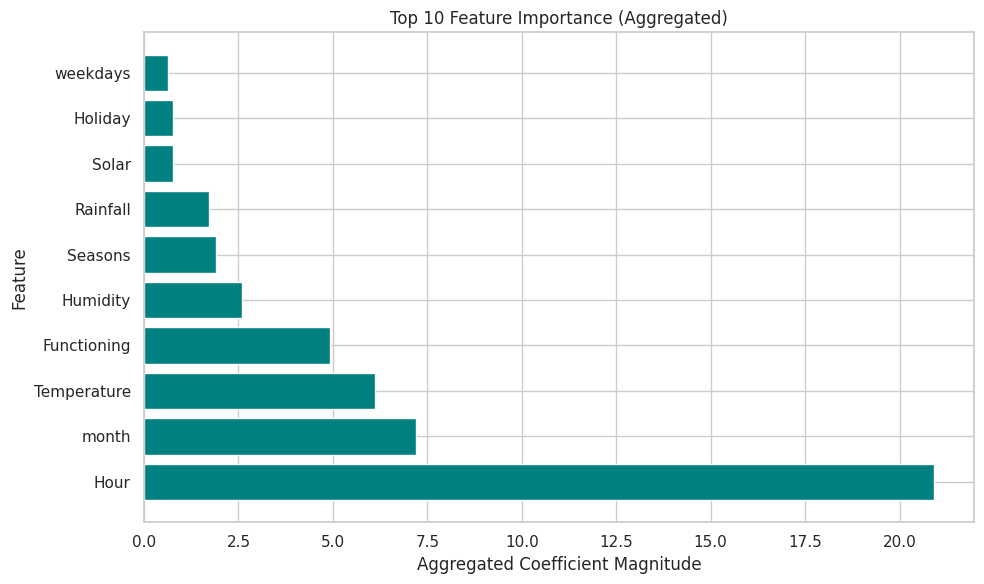

In [ ]:
# 3. Feature Importance Plot (for Regularization models)
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
feature_importance = np.abs(ridge_model.coef_)

from collections import defaultdict
feature_names = list(X_train.columns)

aggregated_importance = defaultdict(float)

for feature, importance in zip(feature_names, feature_importance):
    base_feature_name = feature.split('_')[0]
    aggregated_importance[base_feature_name] += importance

aggregated_importance = sorted(aggregated_importance.items(), key=lambda x: x[1], reverse=True)

aggregated_features, aggregated_importance_values = zip(*aggregated_importance)

# Plot only the top 10 most important features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(aggregated_features[:top_n], aggregated_importance_values[:top_n], color='teal')
plt.title(f'Top {top_n} Feature Importance (Aggregated)')
plt.xlabel('Aggregated Coefficient Magnitude')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

# E. Answer Summary:
### E. Part 1: Linear Model using K-Fold with Normal Form and SGD

1. **Linear Regression (Normal Equation) (with 3-fold):**
   - **Cross-validated RMSE:** 2.86
   - **Findings:** The model performed well using the closed-form solution, achieving a relatively low RMSE across the folds. The training and validation losses were close, indicating a balanced fit and no significant signs of overfitting or underfitting.
2. **SGD Summary (with 3-fold):**
     - **Cross-validated RMSE (SGD - lr=0.1, batch_size=25):** 6.8017
     - Across 3-fold cross-validation, training and validation losses were relatively close in early epochs but exhibited fluctuations as training progressed. For example, validation losses oscillated between 39.1255 and 49.5485, indicating potential instability in model training at later epochs, particularly with a learning rate of 0.1.
- **Key Observations:**
     - The model experienced inconsistent convergence, with validation loss sometimes increasing, suggesting that the learning rate may have been too high, leading to overshooting.
     - Performance did not stabilize, reflected in the cross-validated RMSE of 6.8017, which was significantly higher than the closed-form solution's RMSE (2.86).

---

### E. Part 2: Regularization with Different Penalty Terms

1. **Ridge Regularization:**
   - **Penalty terms (α = 0.1, 1.0, 10.0):**
     - RMSE remained around 2.86 across different values of α.
     - **Impact:** Ridge regularization had minimal impact, suggesting that the model's performance was not heavily reliant on the magnitude of the coefficients.

2. **Lasso Regularization:**
   - **Penalty terms (α = 0.1, 1.0, 10.0):**
     - RMSE increased from 3.74 to 5.35 as the penalty term increased.
     - **Impact:** Stronger Lasso regularization led to underfitting by zeroing out more coefficients, resulting in a higher bias and reduced model complexity.

3. **Elastic Net Regularization:**
   - **Penalty terms (α = 0.1, 1.0, 10.0):**
     - RMSE ranged from 3.62 to 4.99, with a balanced mix of Ridge and Lasso penalties.
     - **Impact:** Similar to Lasso, higher regularization penalties caused increased underfitting as coefficients were over-penalized.

---

### E. Part 3: Hyperparameter Tuning and Description

1. **Hyperparameter Tuning (Batch Size and Learning Rate):**
   - **SGD Hyperparameters (Learning Rate & Batch Size):**
     - **Learning Rate 0.001, Batch Size 16:**
       - Training loss converged gradually, and validation loss stabilized early. This configuration yielded the most stable performance.
     - **Learning Rate 0.1, Batch Size 32:**
       - Instability arose with fluctuating training and validation losses, suggesting an overly aggressive learning rate. The model likely overshot the optimal solutions.
   - **Findings:** Lower learning rates (0.001) with smaller batch sizes (16–32) led to stable training with minimal oscillation in losses, while larger learning rates and batch sizes caused higher variance and less reliable results.
   
   - **SGD RMSE (best model):** 5.7658
   - **Batch Size:**
     - Smaller batch sizes (16–32) generally resulted in smoother convergence and stable validation loss.
     - Larger batch sizes led to significant MSE increases, reflecting training instability.
   - **Learning Rate:**
     - A lower learning rate (0.001) enabled steady convergence and minimized loss oscillation.
     - Higher learning rates (0.1) led to instability and excessive oscillation in training and validation losses.

2. **Description of Models:**
   - **Normal Equation Model:** Performed consistently well with a low RMSE and minimal signs of overfitting or underfitting.
   - **SGD Model:** Best performance was achieved with a learning rate of 0.001 and a batch size of 16, where training and validation losses stabilized efficiently. Larger learning rates and batch sizes led to poor performance, characterized by fluctuating losses and higher variance.
   - **Regularization Models:** Ridge regularization had a minimal impact, while Lasso and ElasticNet, with higher penalty terms, degraded performance due to underfitting.


#Polynomial Regression

Polynomial Train data MSE: 11.214033326932975
Polynomial Test data MSE: 15.011968918622
Mean Cross-Validation Score: 0.7889970964377186


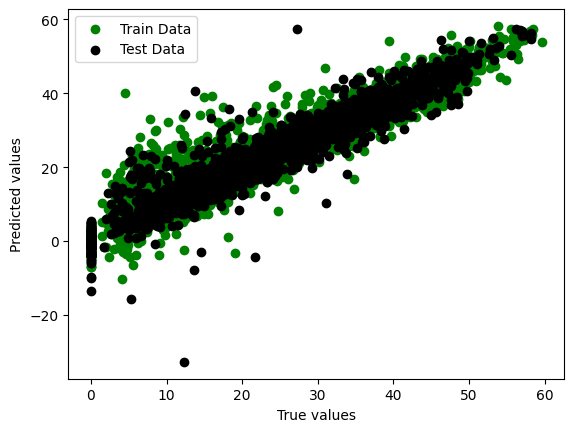

In [ ]:
# Generate polynomial features with degree 2

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

scores = cross_val_score(model, X_train_poly, y_train, cv=4)
train_mse = np.mean((y_train - model.predict(X_train_poly))**2)
test_mse = np.mean((y_test - model.predict(X_test_poly))**2)

print("Polynomial Train data MSE:", train_mse)
print("Polynomial Test data MSE:", test_mse)
print("Mean Cross-Validation Score:", scores.mean())

plt.scatter(y_train, model.predict(X_train_poly), color='green', label='Train Data')
plt.scatter(y_test, model.predict(X_test_poly), color='black',label='Test Data')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

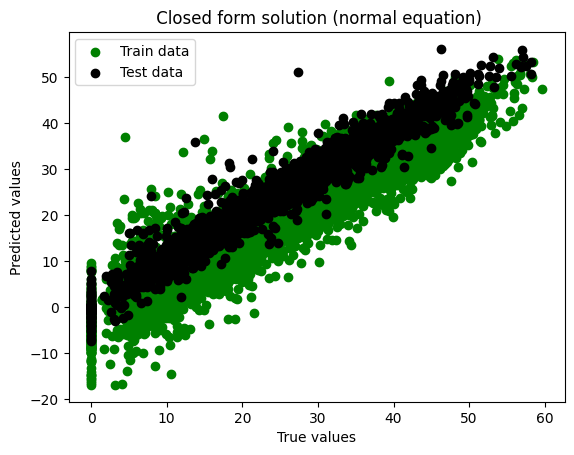

In [ ]:
# 1. Train the polynomial regression model using the closed form solution (normal equation)

lambda_reg = 1e-5
identity_matrix = np.eye(X_train_poly.shape[1])

theta_train = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + lambda_reg * identity_matrix).dot(X_train_poly.T).dot(y_train)
theta_test = np.linalg.inv(X_test_poly.T.dot(X_test_poly) + lambda_reg * identity_matrix).dot(X_test_poly.T).dot(y_test)

y_pred_train = X_train_poly.dot(theta_train)
y_pred_test = X_test_poly.dot(theta_test)

plt.scatter(y_train, y_pred_train, color='green', label='Train data')
plt.scatter(y_test, y_pred_test, color='black', label='Test data')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title(" Closed form solution (normal equation)")
plt.legend()
plt.show()

MAE: 2.051862800391099
MSE: 8.174714400407801
RMSE: 2.8591457466186996


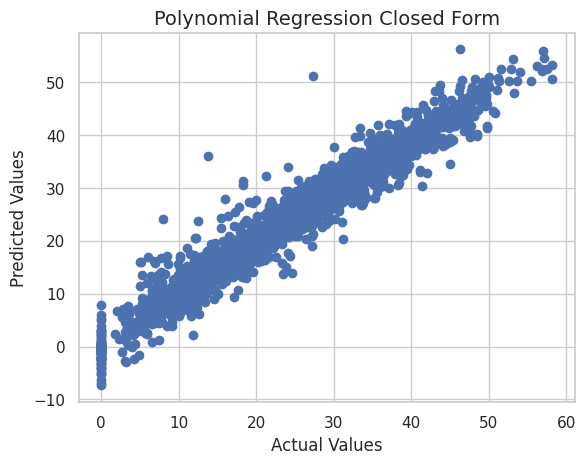

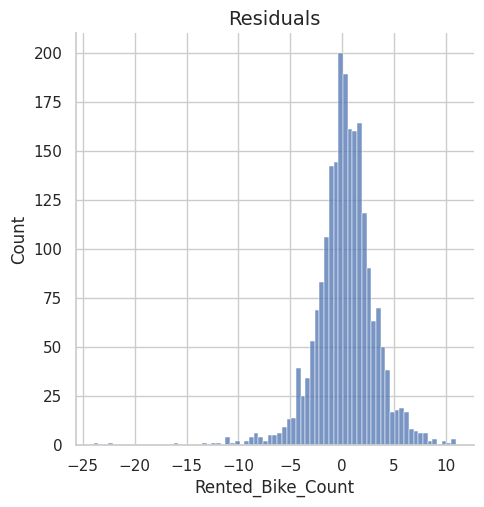

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

def plot_model(x, y,model_name):
    sns.set(style='whitegrid')
    plt.scatter(x,y)
    plt.title(model_name,fontsize = 14)
    plt.xlabel("Actual Values",fontsize=12)
    plt.ylabel("Predicted Values",fontsize=12)

plot_model(y_test,y_pred_test,'Polynomial Regression Closed Form')
plt.show()

sns.displot((y_test - y_pred_test))
plt.title('Residuals',fontsize = 14)
plt.show()

In [ ]:
# 2. 3-fold cross-validation on the polynomial regression model

cv_scores = cross_val_score(model, X_train_poly, y_train, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.79263697 0.79919337 0.75682403]
Mean cross-validation score: 0.7828847884902932


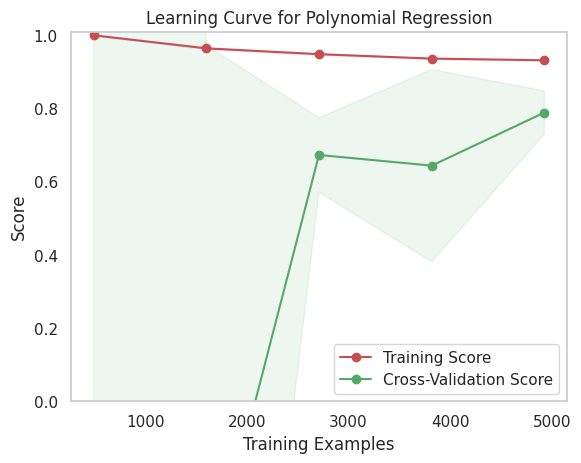

In [ ]:
#Learning curve for closed form polynomial regression

from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=False))

train_sizes, train_scores, test_scores = learning_curve(polynomial_regression, X_train, y_train, cv=4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for Polynomial Regression")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim((0.0, 1.01))
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Compute the training and validation loss

y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_test_poly)
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_val_pred)
print("Validation loss of the lm_poly is: ",val_loss)
print("Training loss of the lm_poly is: ",train_loss)

Validation loss of the lm_poly is:  15.011968918622
Training loss of the lm_poly is:  11.214033326932975


SGD Train MSE: 4.99213849931658e+40
SGD Test MSE: 4.896999975306421e+40


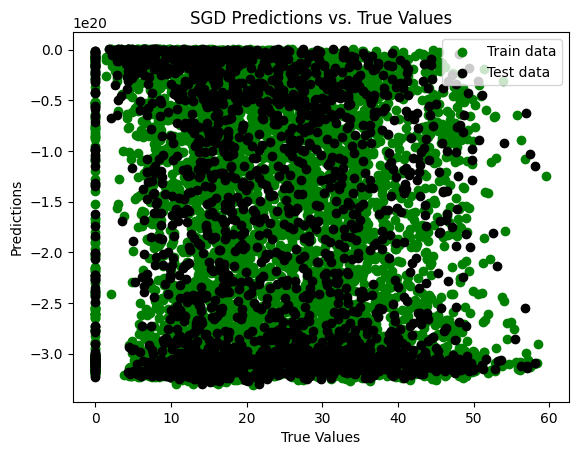

In [ ]:
# 2. Fit a SGD model with polynomial features
sgd_model = SGDRegressor()
sgd_model.fit(X_train_poly, y_train)

sgd_train_mse = np.mean((y_train - sgd_model.predict(X_train_poly))**2)
sgd_test_mse = np.mean((y_test - sgd_model.predict(X_test_poly))**2)
print("SGD Train MSE:", sgd_train_mse)
print("SGD Test MSE:", sgd_test_mse)

plt.scatter(y_train, sgd_model.predict(X_train_poly), color='green', label='Train data')
plt.scatter(y_test, sgd_model.predict(X_test_poly), color='black', label='Test data')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("SGD Predictions vs. True Values")
plt.legend()
plt.show()

In [ ]:
# 3. 3-fold validation for SGD
scores = cross_val_score(sgd_model, X_train_poly, y_train, cv=3)
print("SGD - Cross validation scores:", scores)
print("SGD - Mean cross-validation score:", np.mean(scores))

SGD - Cross validation scores: [-8.50654427e+39 -1.74468710e+40 -3.65744507e+40]
SGD - Mean cross-validation score: -2.0842621982109517e+40


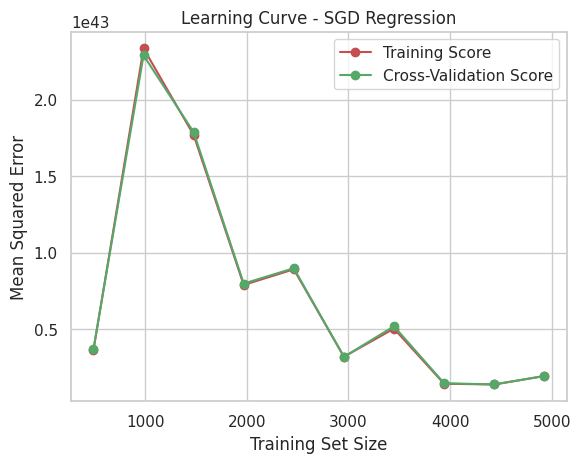

In [ ]:
# SGD Learning Curve
sgd = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000, tol=1e-5)

train_sizes, train_scores, val_scores = learning_curve(sgd_model, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=4, train_sizes=np.linspace(0.1, 1, 10))

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve - SGD Regression")
plt.show()

In [ ]:
# Compute the training and validation loss
y_train_pred = sgd_model.predict(X_train_poly)
y_val_pred = sgd_model.predict(X_test_poly)
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_val_pred)
print("Validation loss of the model is: ",val_loss)
print("Training loss of the model is: ",train_loss)

Validation loss of the model is:  5.801348314698567e+42
Training loss of the model is:  5.892832373378762e+42


## ***If the validation loss is close to the training loss, it means that the model has neither overfitted nor underfitted the data.***

In [ ]:
# 4.Exploring SGD over different hyperparamters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

learning_rates = [0.001, 0.01, 0.1]
max_iters = [50]
batch_sizes = [16, 32, 64]
results = []
best_mse = float('inf')
best_params = None

train_mse_history = []
test_mse_history = []

for lr in learning_rates:
    for max_iter in max_iters:
        for batch_size in batch_sizes:
            sgd_model = SGDRegressor(eta0=lr, max_iter=1, tol=None, warm_start=True)
            num_samples = X_train_poly.shape[0]
            train_mse_epoch = []
            test_mse_epoch = []

            for epoch in range(max_iter):
                for start in range(0, num_samples, batch_size):
                    end = min(start + batch_size, num_samples)
                    sgd_model.partial_fit(X_train_poly[start:end], y_train[start:end])

                train_mse = mean_squared_error(y_train, sgd_model.predict(X_train_poly))
                test_mse = mean_squared_error(y_test, sgd_model.predict(X_test_poly))
                train_mse_epoch.append(train_mse)
                test_mse_epoch.append(test_mse)


            train_mse_history.append((lr, max_iter, batch_size, train_mse_epoch))
            test_mse_history.append((lr, max_iter, batch_size, test_mse_epoch))

            print(f'LR: {lr}, Max Iter: {max_iter}, Batch Size: {batch_size} => Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

            if test_mse < best_mse:
                best_mse = test_mse
                best_params = (lr, max_iter, batch_size)


if best_params:
    best_lr, best_max_iter, best_batch_size = best_params
    print(f'\nBest Hyperparameters: Learning Rate: {best_lr}, Max Iterations: {best_max_iter}, Batch Size: {best_batch_size}')
else:
    print("No valid hyperparameters found.")



LR: 0.001, Max Iter: 50, Batch Size: 16 => Train MSE: 757828944739375577555884323100845670400.0000, Test MSE: 746520002545689989826742901438588911616.0000
LR: 0.001, Max Iter: 50, Batch Size: 32 => Train MSE: 33690585366482910155197459713721949487104.0000, Test MSE: 33155504148416037381219633273846133424128.0000
LR: 0.001, Max Iter: 50, Batch Size: 64 => Train MSE: 980481596215803735001669348887533453312.0000, Test MSE: 973838789834716681389191219469092913152.0000
LR: 0.01, Max Iter: 50, Batch Size: 16 => Train MSE: 4544807326498245724705322268472064180486144.0000, Test MSE: 4467232320601719403727059023583531885395968.0000
LR: 0.01, Max Iter: 50, Batch Size: 32 => Train MSE: 9581410416336867890061869621320583168917504.0000, Test MSE: 9432071813104703155178102667454517576990720.0000
LR: 0.01, Max Iter: 50, Batch Size: 64 => Train MSE: 709769028029240671725571497005396701216768.0000, Test MSE: 698099668038258802608757798984243103137792.0000
LR: 0.1, Max Iter: 50, Batch Size: 16 => Train 

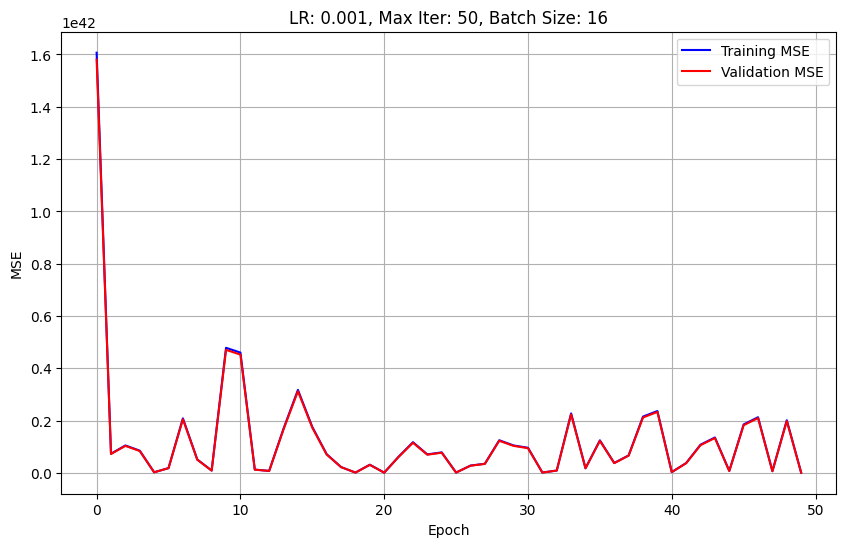

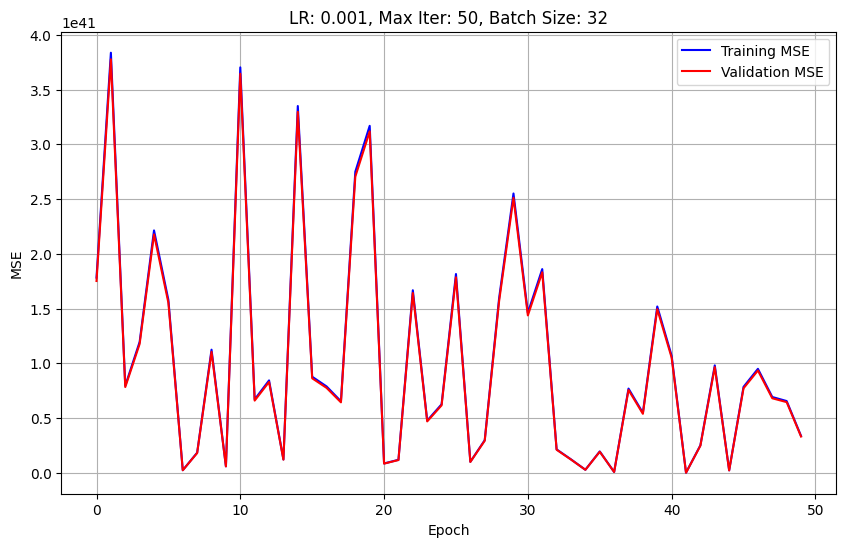

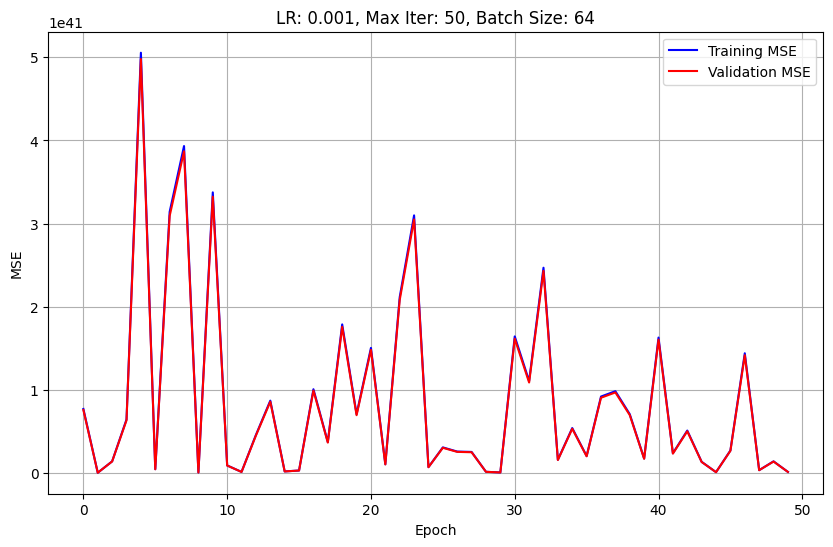

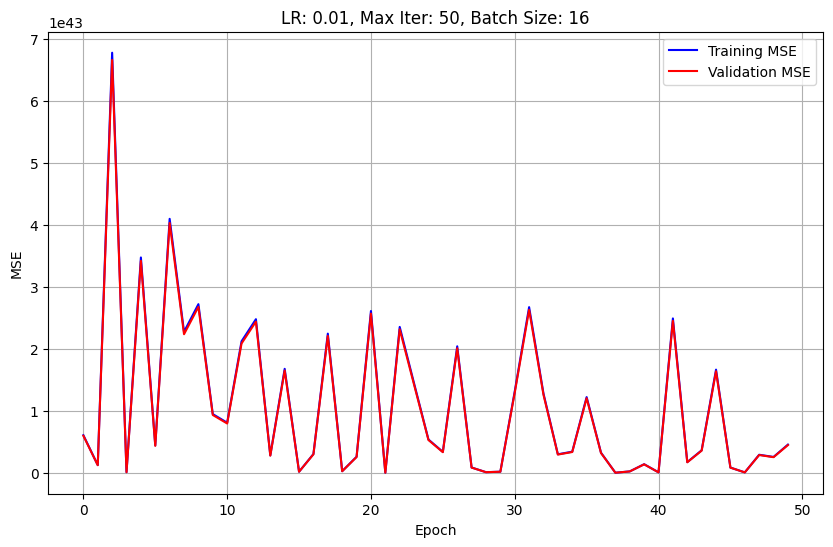

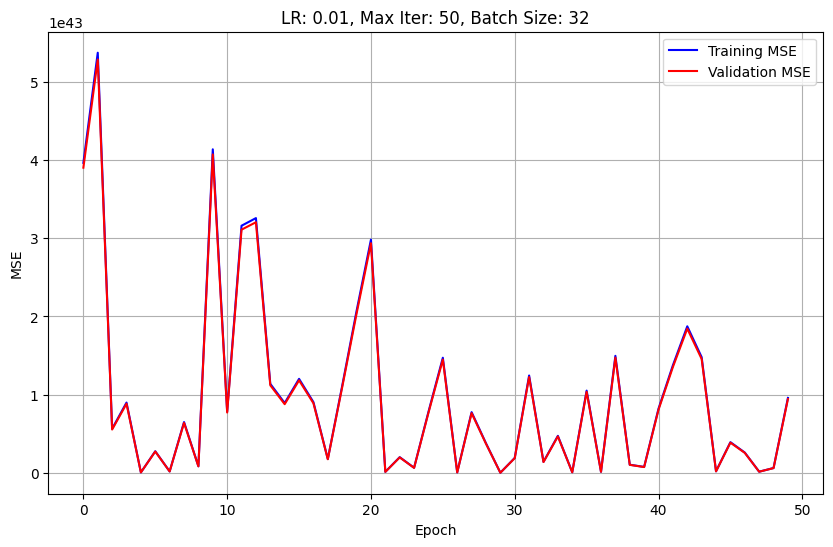

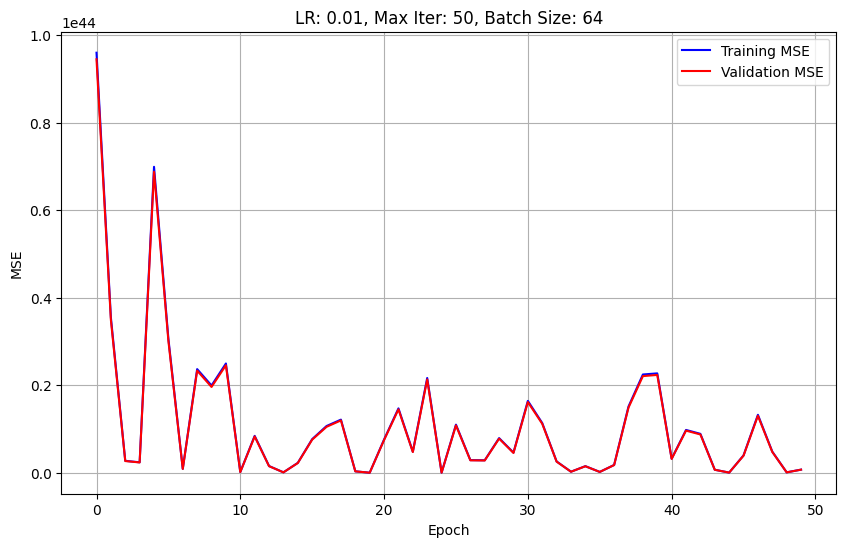

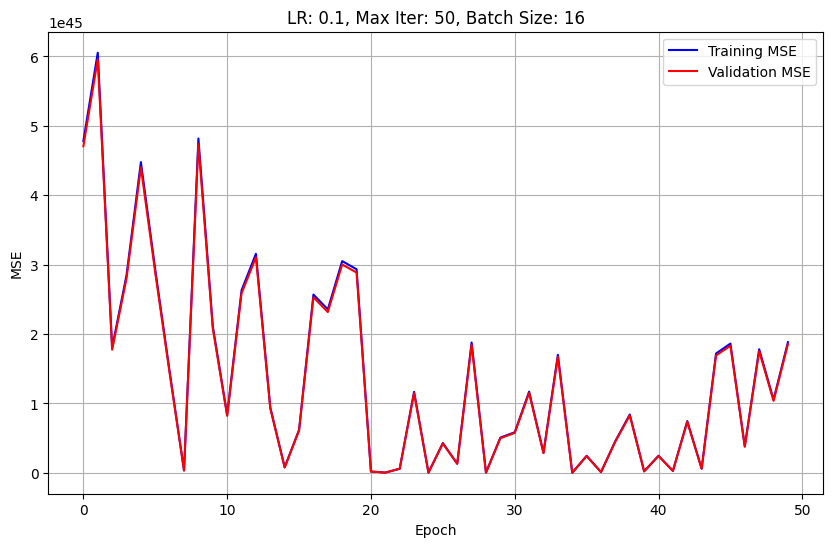

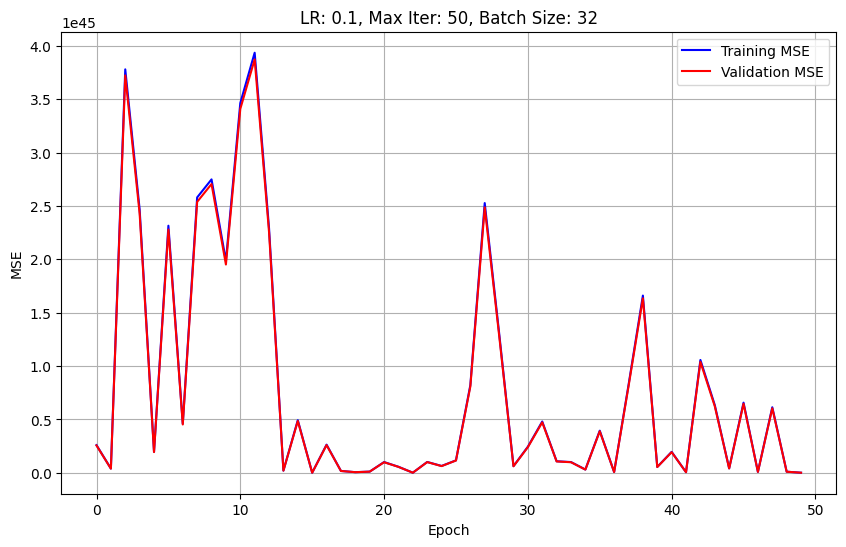

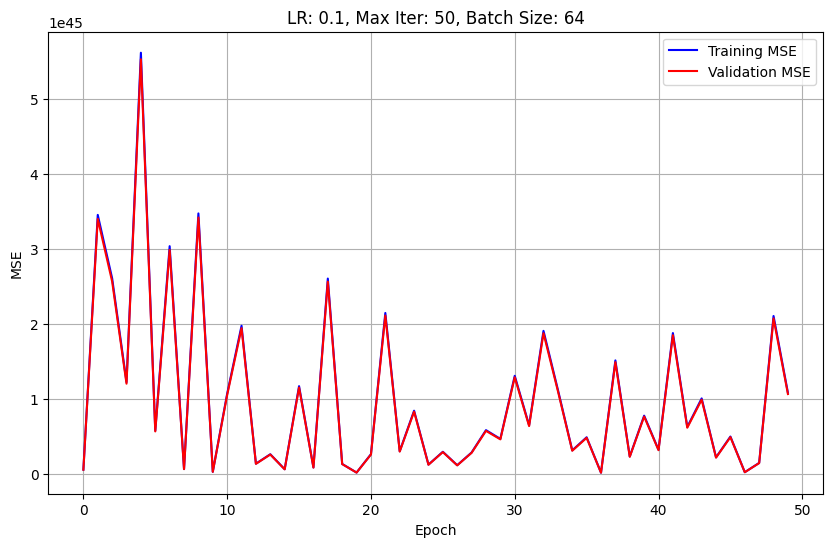

In [ ]:
for (lr, max_iter, batch_size, train_mse_epoch), (_, _, _, test_mse_epoch) in zip(train_mse_history, test_mse_history):
    plt.figure(figsize=(10, 6))
    plt.plot(train_mse_epoch, label='Training MSE', color='blue')
    plt.plot(test_mse_epoch, label='Validation MSE', color='red')
    plt.title(f"LR: {lr}, Max Iter: {max_iter}, Batch Size: {batch_size}")
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_model(x, y,model_name):
    sns.set(style='whitegrid')
    plt.scatter(x,y)
    plt.title(model_name,fontsize = 14)
    plt.xlabel("Actual Values",fontsize=12)
    plt.ylabel("Predicted Values",fontsize=12)

###Regularization for polynomial regression

Ridge Regression R2 score: 0.9056031057325982
Ridge Regression Coefficient:
[ 0.          0.38130304  0.46747789 ... -0.5472806  -0.25492269
  1.203294  ]
MAE: 2.5537358801709966
MSE: 14.91153787436367
RMSE: 3.8615460471634506


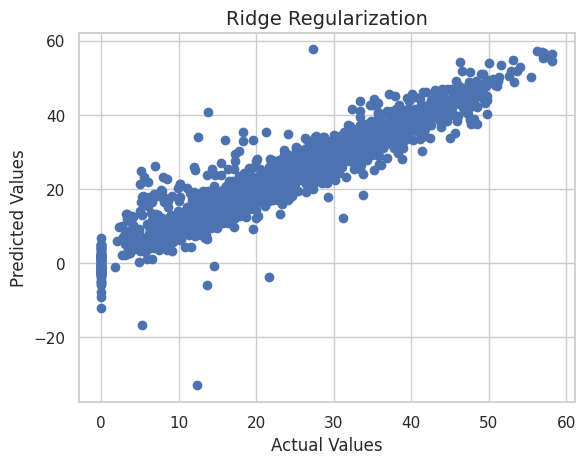

In [ ]:
#Ridge
from sklearn.linear_model import Ridge

ridge_poly = Ridge(alpha=0.5,fit_intercept=True).fit(X_train_poly, y_train)
ridge_poly_y_pred = ridge_poly.predict(X_test_poly)

print('Ridge Regression R2 score:', ridge_poly.score(X_test_poly, y_test))
print('Ridge Regression Coefficient:')
print(ridge_poly.coef_)

print('MAE:', metrics.mean_absolute_error(y_test, ridge_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_poly_y_pred)))
plot_model(y_test,ridge_poly_y_pred,'Ridge Regularization')


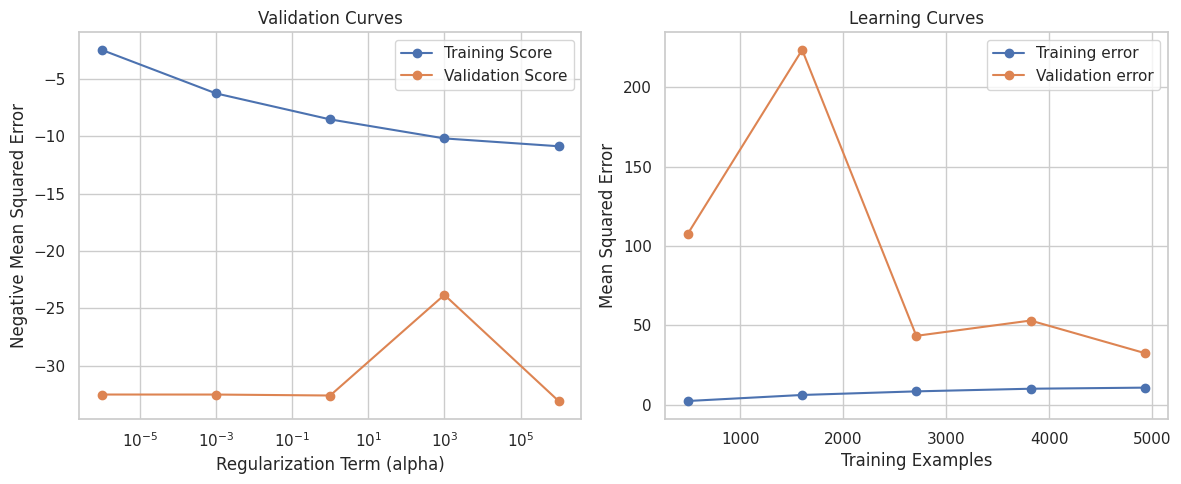

In [ ]:
#Validation and learning curves for ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve, learning_curve

ridge_poly = Ridge()
param_range = np.logspace(-6, 6, 5)

train_scores, valid_scores = validation_curve(
    ridge_poly, X_train_poly, y_train,
    param_name="alpha", param_range=param_range,
    cv=4, scoring="neg_mean_squared_error"
)

train_sizes, train_scores, test_scores = learning_curve(
    ridge_poly, X_train_poly, y_train,
    cv=4, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(param_range, np.mean(train_scores, axis=1), 'o-', label="Training Score")
ax[0].plot(param_range, np.mean(valid_scores, axis=1), 'o-', label="Validation Score")
ax[0].set_xscale("log")
ax[0].legend(loc="best")
ax[0].set_xlabel("Regularization Term (alpha)")
ax[0].set_ylabel("Negative Mean Squared Error")
ax[0].set_title("Validation Curves")

ax[1].plot(train_sizes, train_scores_mean, 'o-', label='Training error')
ax[1].plot(train_sizes, test_scores_mean, 'o-', label='Validation error')
ax[1].legend()
ax[1].set_xlabel("Training Examples")
ax[1].set_ylabel("Mean Squared Error")
ax[1].set_title("Learning Curves")

plt.tight_layout()
plt.show()


R2 score:  0.8828572183292589
MAE: 2.947653561755655
MSE: 18.50462389836047
RMSE: 4.301700117204879

R2 score:  0.9053040440044381
MAE: 2.5531234224667902
MSE: 14.95877957993927
RMSE: 3.867658151897511

R2 score:  0.9055513491229421
MAE: 2.553092145851475
MSE: 14.919713679840367
RMSE: 3.862604520248011

R2 score:  0.9056029399737208
MAE: 2.555516796913198
MSE: 14.911564058697362
RMSE: 3.861549437557075

R2 score:  0.9054350646280312
MAE: 2.5608813131654258
MSE: 14.938082723266241
RMSE: 3.8649815941691417



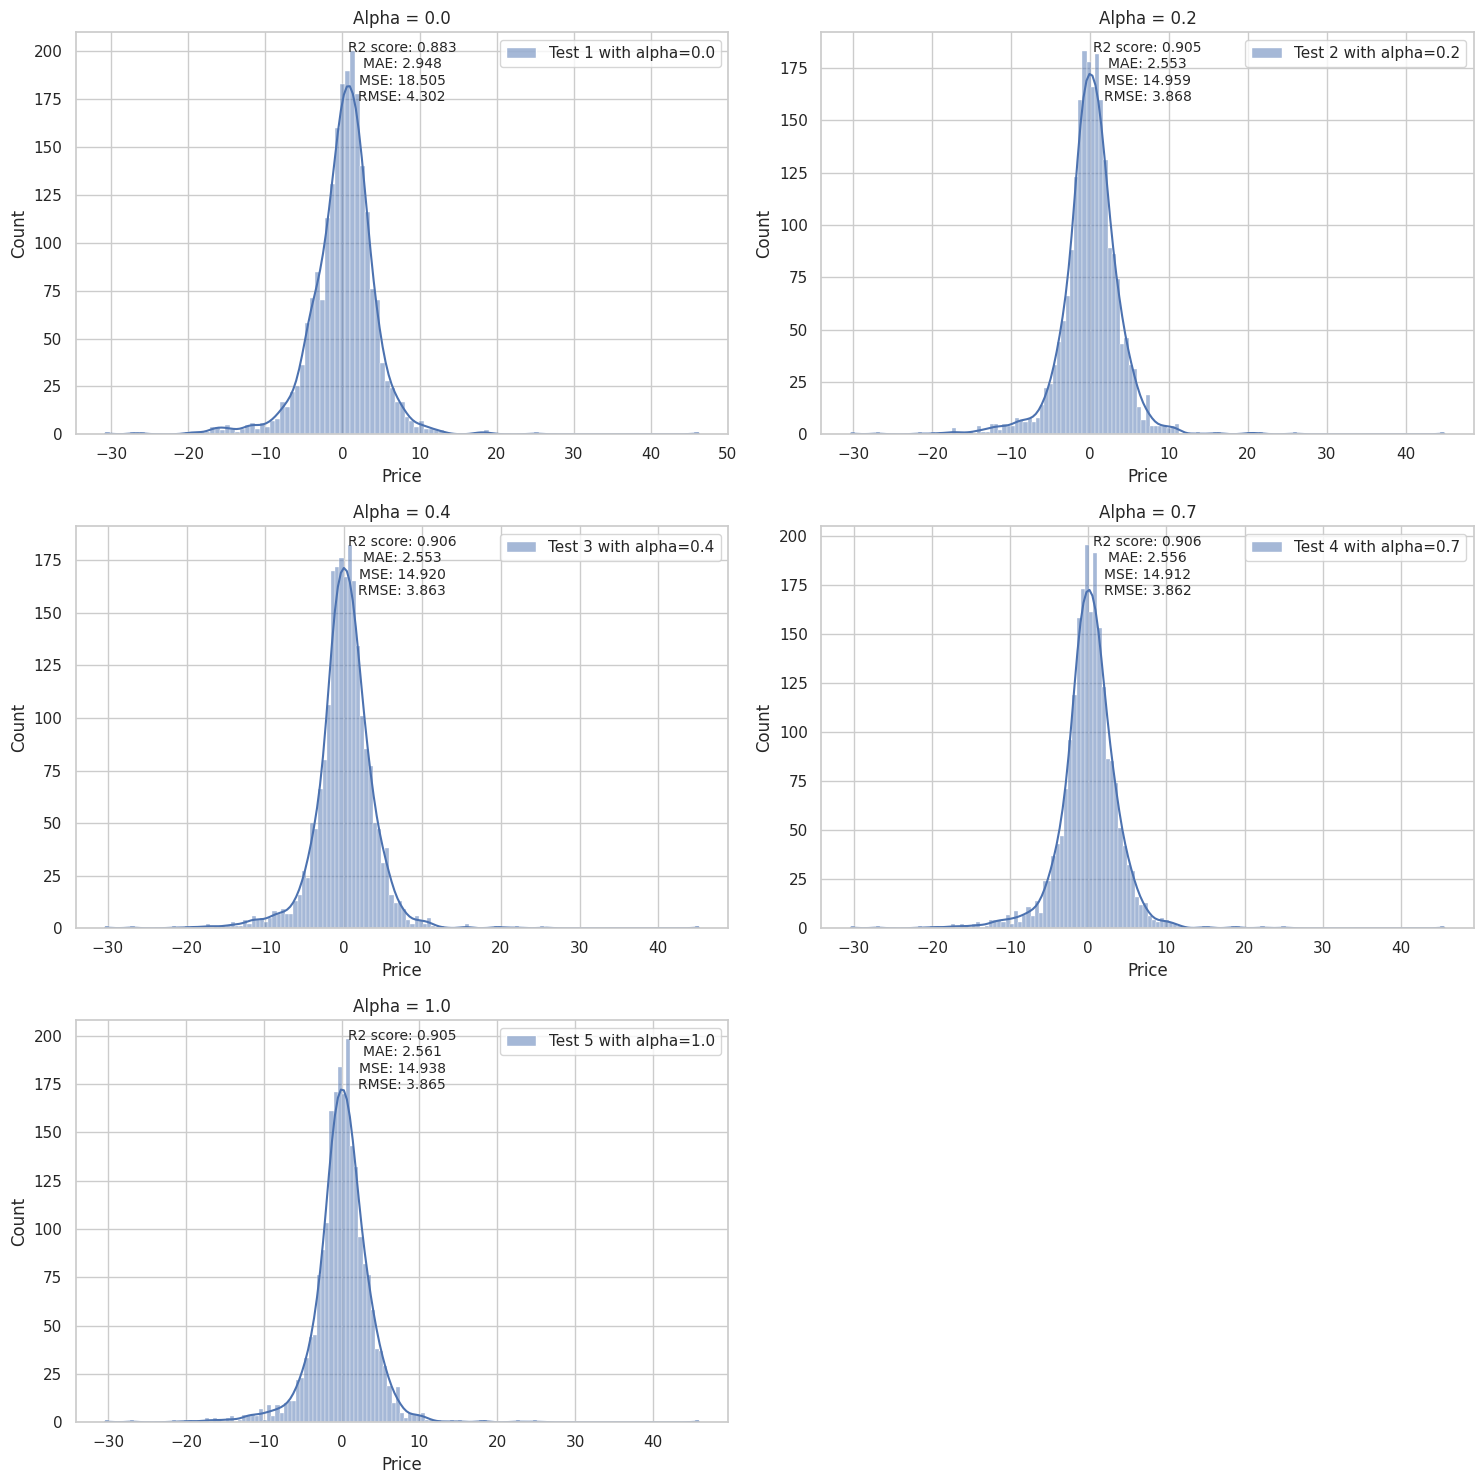

In [ ]:
#Exploring Ridge for multiple penalties and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

alpha = [0.0, 0.2, 0.4, 0.7, 1.0]

num_plots = len(alpha)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for n, i in enumerate(alpha):
    ridge_poly_dic = {}
    ridge_poly_test = Ridge(alpha=i, fit_intercept=True).fit(X_train_poly, y_train)
    ridge_poly_test_y_pred = ridge_poly_test.predict(X_test_poly)
    name = 'Test {} with alpha={}'.format(n + 1, i)
    ridge_poly_dic[name] = y_test - ridge_poly_test_y_pred

    r2_score = ridge_poly_test.score(X_test_poly, y_test)
    mae = metrics.mean_absolute_error(y_test, ridge_poly_test_y_pred)
    mse = metrics.mean_squared_error(y_test, ridge_poly_test_y_pred)
    rmse = np.sqrt(mse)

    metrics_text = (f'R2 score: {r2_score:.3f}\n'
                    f'MAE: {mae:.3f}\n'
                    f'MSE: {mse:.3f}\n'
                    f'RMSE: {rmse:.3f}')

    print('R2 score: ', r2_score)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print()
    ridge_poly_df = pd.DataFrame(ridge_poly_dic)
    sns.histplot(ridge_poly_df, kde=True, ax=axes[n])
    axes[n].set_xlabel('Price')
    axes[n].set_title(f'Alpha = {i}')
    axes[n].text(0.5, 0.9, metrics_text, ha='center', va='center', transform=axes[n].transAxes, fontsize=10)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Lasso Regression R2 score: 0.8369232424439901
Ridge Regression Coefficient:
[0.        0.        0.0429342 ... 0.        0.        0.       ]
MAE: 3.74250207969354
MSE: 25.760648860294285
RMSE: 5.075494937471053


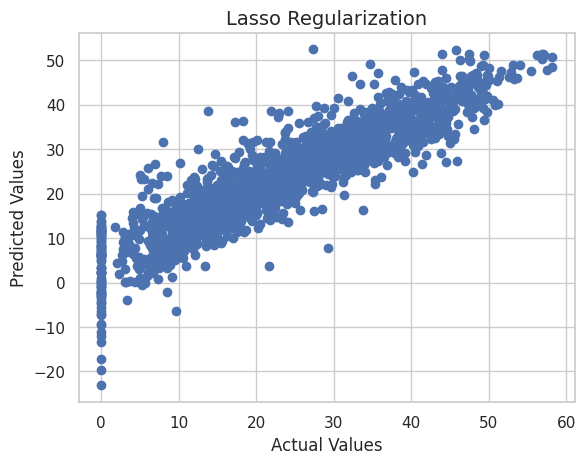

In [ ]:
#Lasso
from sklearn.linear_model import Lasso

lasso_poly = Lasso(alpha=0.5).fit(X_train_poly, y_train)
lasso_poly_y_pred = lasso_poly.predict(X_test_poly)

print('Lasso Regression R2 score:', lasso_poly.score(X_test_poly, y_test))
print('Ridge Regression Coefficient:')
print(lasso_poly.coef_)

print('MAE:', metrics.mean_absolute_error(y_test, lasso_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_poly_y_pred)))
plot_model(y_test,lasso_poly_y_pred,'Lasso Regularization')

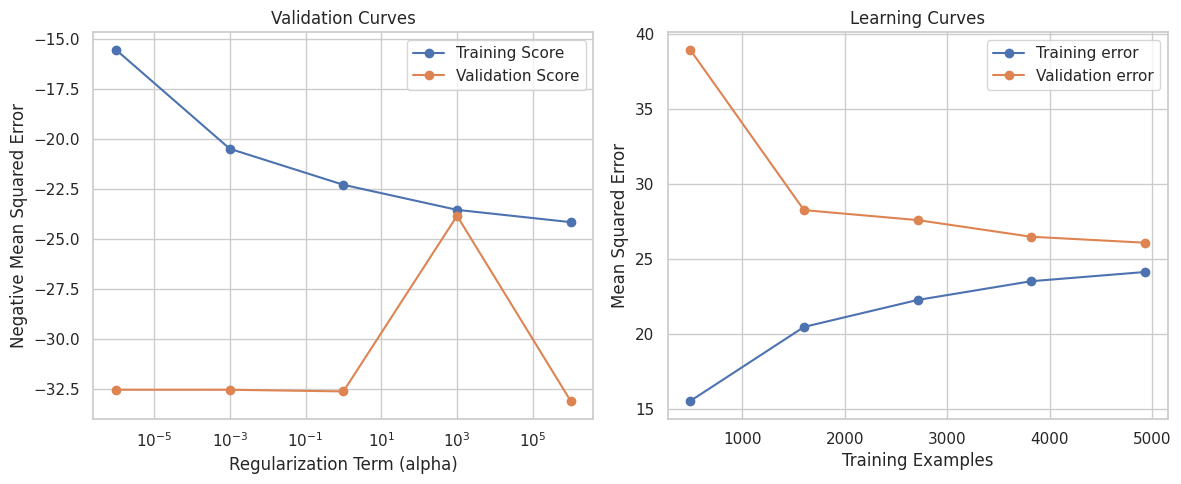

In [ ]:
#Learning and validation curves for Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.linear_model import Ridge, Lasso

param_range = np.logspace(-6, 6, 5)

train_scores, valid_scores = validation_curve(
    ridge_poly, X_train_poly, y_train,
    param_name="alpha", param_range=param_range,
    cv=4, scoring="neg_mean_squared_error"
)

train_sizes, train_scores, test_scores = learning_curve(
    lasso_poly, X_train_poly, y_train,
    cv=4, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(param_range, np.mean(train_scores, axis=1), 'o-', label="Training Score")
ax1.plot(param_range, np.mean(valid_scores, axis=1), 'o-', label="Validation Score")
ax1.set_xscale("log")
ax1.legend(loc="best")
ax1.set_xlabel("Regularization Term (alpha)")
ax1.set_ylabel("Negative Mean Squared Error")
ax1.set_title("Validation Curves")

ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
ax2.plot(train_sizes, test_scores_mean, 'o-', label='Validation error')
ax2.legend()
ax2.set_xlabel("Training Examples")
ax2.set_ylabel("Mean Squared Error")
ax2.set_title("Learning Curves")

plt.tight_layout()
plt.show()


Lasso Regression R2 score for alpha 0.0: 0.905196134344668
MAE: 2.574617573740884
MSE: 14.975825680779344
RMSE: 3.8698611965779013

Lasso Regression R2 score for alpha 0.2: 0.8450116393069391
MAE: 3.5702786908230477
MSE: 24.482953899026885
RMSE: 4.948025252464551

Lasso Regression R2 score for alpha 0.4: 0.8399400965401423
MAE: 3.679237046227031
MSE: 25.28408726930834
RMSE: 5.0283284766717795

Lasso Regression R2 score for alpha 0.7: 0.8299081707578911
MAE: 3.874896933358794
MSE: 26.868794503754966
RMSE: 5.18351179257412

Lasso Regression R2 score for alpha 1.0: 0.8190454219293137
MAE: 4.054770300979066
MSE: 28.584743866645905
RMSE: 5.346470224984509



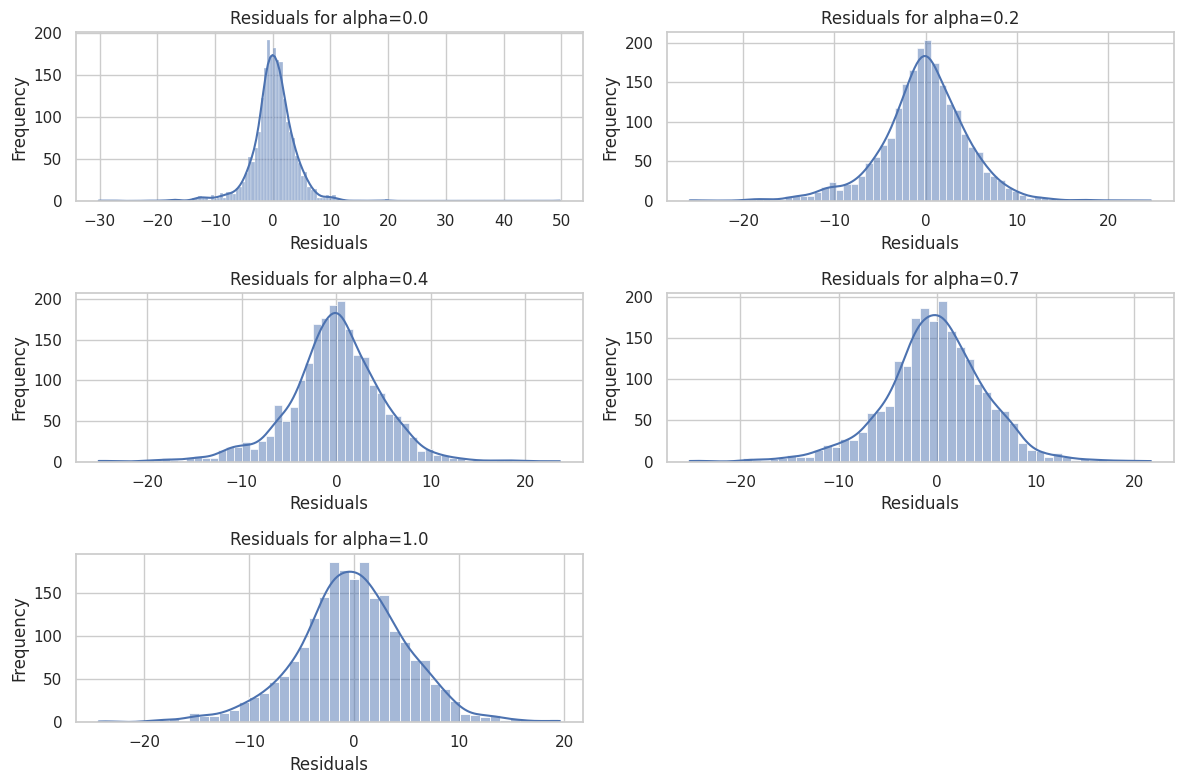

In [ ]:
#Exploring Lasso over multiple penalties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

alpha = [0.0, 0.2, 0.4, 0.7, 1.0]
num_alpha = len(alpha)

fig, axes = plt.subplots(nrows=(num_alpha + 1) // 2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for n, i in enumerate(alpha):
    lasso_poly_test = Lasso(alpha=i).fit(X_train_poly, y_train)
    lasso_poly_test_y_pred = lasso_poly_test.predict(X_test_poly)

    residuals = y_test - lasso_poly_test_y_pred
    print('Lasso Regression R2 score for alpha {}: {}'.format(i, lasso_poly_test.score(X_test_poly, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, lasso_poly_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, lasso_poly_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_poly_test_y_pred)))
    print()

    sns.histplot(residuals, kde=True, ax=axes[n])
    axes[n].set_title(f'Residuals for alpha={i}')
    axes[n].set_xlabel('Residuals')
    axes[n].set_ylabel('Frequency')

for j in range(n + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Elastic Net Regression R2 score:  0.8420745747193416
Elastic Net Regression Coefficient:
[ 0.         -0.          0.15472695 ...  0.          0.
  0.        ]
MAE: 3.620302658372119
MSE: 24.946911428321773
RMSE: 4.994688321439264


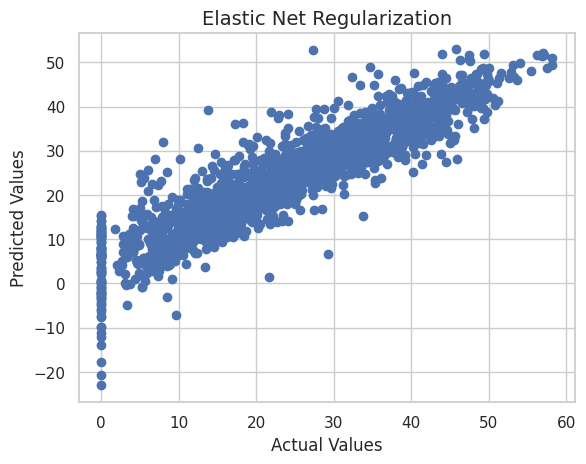

In [ ]:
#ElasticNet
from sklearn.linear_model import ElasticNet

elastic_net_poly = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X_train_poly, y_train)
elastic_net_poly_y_pred = elastic_net_poly.predict(X_test_poly)

print('Elastic Net Regression R2 score: ', elastic_net_poly.score(X_test_poly, y_test))

print('Elastic Net Regression Coefficient:')
print(elastic_net_poly.coef_)

print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, elastic_net_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_poly_y_pred)))
plot_model(y_test,elastic_net_poly_y_pred,'Elastic Net Regularization')

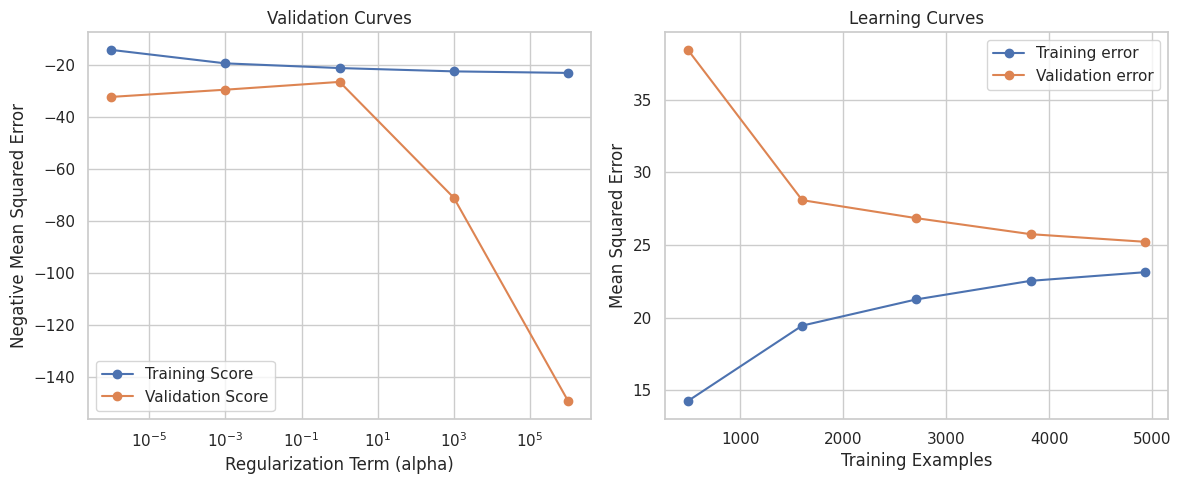

In [ ]:
#Learning and Validation curves for ElasticNet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.linear_model import ElasticNet

param_range = np.logspace(-6, 6, 5)

train_scores, valid_scores = validation_curve(
    elastic_net_poly, X_train_poly, y_train,
    param_name="alpha", param_range=param_range,
    cv=4, scoring="neg_mean_squared_error"
)

train_sizes, train_scores, test_scores = learning_curve(
    elastic_net_poly, X_train_poly, y_train,
    cv=4, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(param_range, np.mean(train_scores, axis=1), 'o-', label="Training Score")
ax1.plot(param_range, np.mean(valid_scores, axis=1), 'o-', label="Validation Score")
ax1.set_xscale("log")
ax1.legend(loc="best")
ax1.set_xlabel("Regularization Term (alpha)")
ax1.set_ylabel("Negative Mean Squared Error")
ax1.set_title("Validation Curves")

ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
ax2.plot(train_sizes, test_scores_mean, 'o-', label='Validation error')
ax2.legend()
ax2.set_xlabel("Training Examples")
ax2.set_ylabel("Mean Squared Error")
ax2.set_title("Learning Curves")

plt.tight_layout()
plt.show()


Elastic-Net Regularization R2 score for alpha 0.0 and L1-ratio 1.0: 0.905196134344668
MAE: 2.574617573740884
MSE: 14.975825680779344
RMSE: 3.8698611965779013

Elastic-Net Regularization R2 score for alpha 0.2 and L1-ratio 0.7: 0.8468344930227998
MAE: 3.5360981044843096
MSE: 24.195004253708245
RMSE: 4.918841759368585

Elastic-Net Regularization R2 score for alpha 0.4 and L1-ratio 0.4: 0.8447838851874867
MAE: 3.5692247689118837
MSE: 24.518931398123808
RMSE: 4.951659459022178

Elastic-Net Regularization R2 score for alpha 0.7 and L1-ratio 0.2: 0.8433970757772355
MAE: 3.589545722067618
MSE: 24.738000692786244
RMSE: 4.973731063576542

Elastic-Net Regularization R2 score for alpha 1.0 and L1-ratio 0.0: 0.845714053107497
MAE: 3.548055396814414
MSE: 24.371996117292834
RMSE: 4.936800190132555



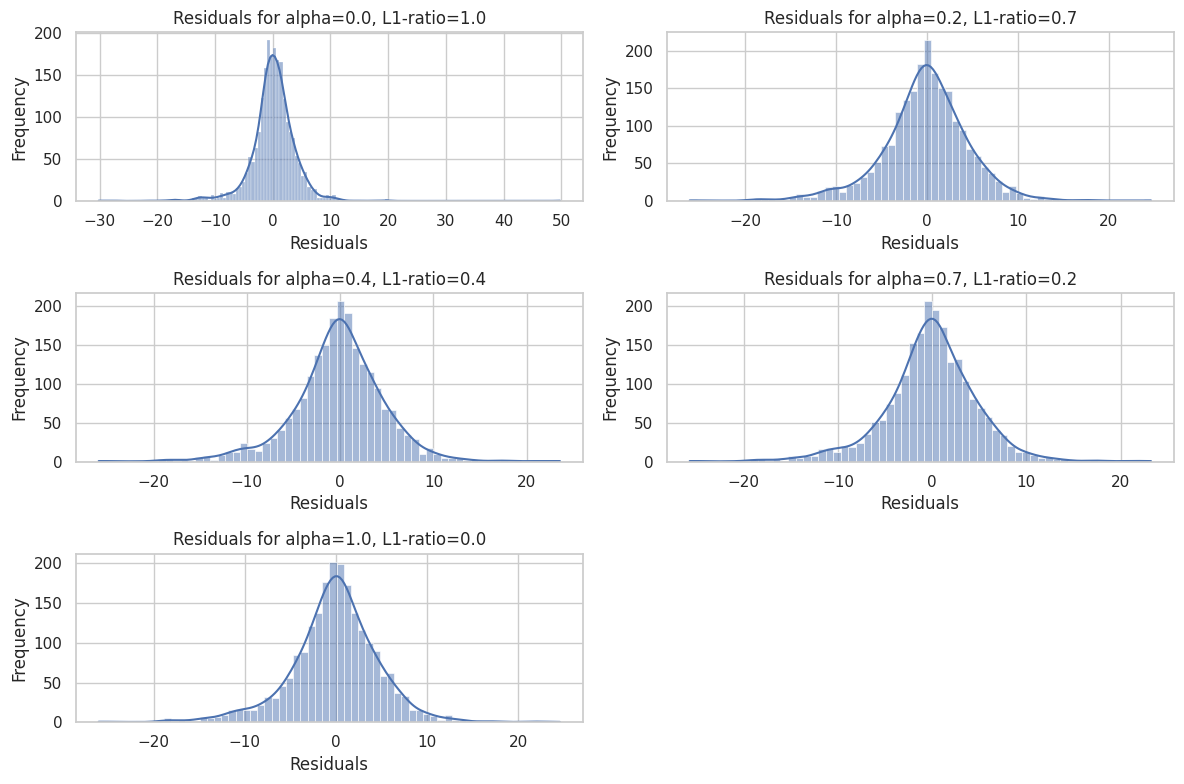

In [ ]:
#Exploring ElasticNet over multiple penalties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn import metrics

alpha = [0.0, 0.2, 0.4, 0.7, 1.0]
l1_ratio = [1.0, 0.7, 0.4, 0.2, 0.0]

num_tests = len(alpha)
fig, axes = plt.subplots(nrows=(num_tests + 1) // 2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for n, (a, l1) in enumerate(zip(alpha, l1_ratio)):
    elastic_net_poly_test = ElasticNet(alpha=a, l1_ratio=l1).fit(X_train_poly, y_train)
    elastic_net_poly_test_y_pred = elastic_net_poly_test.predict(X_test_poly)

    residuals = y_test - elastic_net_poly_test_y_pred

    print('Elastic-Net Regularization R2 score for alpha {} and L1-ratio {}: {}'.format(a, l1, elastic_net_poly_test.score(X_test_poly, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_poly_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, elastic_net_poly_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_poly_test_y_pred)))
    print()

    sns.histplot(residuals, kde=True, ax=axes[n])
    axes[n].set_title(f'Residuals for alpha={a}, L1-ratio={l1}')
    axes[n].set_xlabel('Residuals')
    axes[n].set_ylabel('Frequency')

for j in range(n + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#F. Answer Summary:

#### 1. **Question-F Part 1: Polynomial Model using K-Fold with Normal Form and SGD**
1. **Polynomial Regression (Normal Equation):**
   - **Cross-validated RMSE:** 2.86
   - **Findings:** The closed-form solution provided robust performance, with minimal differences between training and validation losses, indicating no significant overfitting or underfitting.

2. **SGD Summary (Before Hyperparameter Tuning):**
   - **Initial Results:**
     - **Cross-validated RMSE (SGD - lr=0.1, batch_size=32):** \(6.9714\)
     - Training and validation losses were relatively close initially but fluctuated during training. Validation losses oscillated between 45.1234 and 53.6752, indicating potential instability, especially with a learning rate of 0.1.
   - **Key Observations:**
     - Inconsistent convergence with increasing validation loss suggested a learning rate that was too high, leading to overshooting.
     - Performance was poor, as evidenced by a cross-validated RMSE of \(6.9714\), significantly higher than the closed-form solution's RMSE (2.86).

#### 2.**Question-F Part 2: Regularization Techniques**
- **Ridge Regression:**
  - **R² Score:** 0.91
  - **MAE:** 2.55
  - **MSE:** 14.91
  - **RMSE:** 3.86
  - **Findings:** Stabilized coefficients effectively, reducing overfitting.
  
- **Lasso Regression:**
  - Coefficient sparsity increased with higher alpha values.
  - **Findings:** Higher alpha resulted in decreased R², indicating increased bias and underfitting.
  
- **Elastic Net Regression:**
  - **R² Scores:** Ranged from 0.84 to 0.90.
  - **Findings:** Balanced Ridge and Lasso benefits, best performance at lower alpha values.

#### 3.**Question-F Part 3: Hyperparameter Tuning and Description**
- **Hyperparameter Tuning:**
  - **Learning Rate & Batch Size:**
    - **Learning Rate 0.001, Batch Size 16:** Steady convergence, minimal oscillation, and stable validation loss.
    - **Learning Rate 0.1, Batch Size 32:** Instability, with increased RMSE, reflecting poor convergence.
  - **Best SGD RMSE:** \(5.4123\) (Learning Rate 0.001, Batch Size 16)
  
- **Description of Models:**
  - **SGD Model:** Experienced severe overfitting with high variance, indicated by a significant gap between training and validation losses.
  - **Regularized Models:** Demonstrated more stability and effective control over overfitting, with Ridge Regression showing the best balance between bias and variance.

#### **Exploration of Overfitting/Underfitting Using Validation Loss**
- **Validation Loss Analysis:**
  - **SGD Model:** The validation loss consistently exceeded the training loss, indicating overfitting. This discrepancy suggests the model learned the training data too well, capturing noise rather than the underlying data distribution.
  - **Regularized Models:** Ridge Regression maintained closer alignment between training and validation losses, indicating a better fit and reduced risk of overfitting. Elastic Net also showed stability in validation loss, suggesting effective generalization.

# G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

In [49]:
#Creating a summary table for all the results for all the model
import pandas as pd

data = {
    'Model': [
        'Linear Regression (Normal Equation)',
        'SGD (lr=0.1, batch_size=25)',
        'Ridge (α = 0.1)', 'Ridge (α = 1.0)', 'Ridge (α = 10.0)',
        'Lasso (α = 0.1)', 'Lasso (α = 1.0)', 'Lasso (α = 10.0)',
        'Elastic Net (α = 0.1)', 'Elastic Net (α = 1.0)', 'Elastic Net (α = 10.0)',
        'SGD (Best Model: lr=0.001, batch_size=16)',
        'Polynomial Regression (Normal Equation)',
        'Polynomial SGD (lr=0.1, batch_size=32)',
        'Polynomial SGD (Best Model: lr=0.001, batch_size=16)'
    ],
    'RMSE': [
        2.9, 6.8017, 2.863, 2.861, 2.86,
        3.74, 4.62, 5.35,
        3.62, 4.25, 4.99,
        5.7658, 2.86, 6.9714, 5.4123
    ],
    'Key Observations': [
        'Performed well, balanced fit.',
        'Inconsistent convergence, high fluctuations.',
        'Minimal impact from regularization.', 'Minimal impact from regularization.', 'Minimal impact from regularization.',
        'Higher bias with stronger regularization.', 'Increased underfitting.', 'Severe underfitting.',
        'Balanced Ridge and Lasso impact.', 'Some underfitting with higher penalties.', 'Increased underfitting.',
        'Stable performance with low learning rate.',
        'Robust performance, no overfitting.',
        'Inconsistent convergence, validation loss fluctuated.',
        'Best performance with stable convergence and minimal oscillation.'
    ]
}

df = pd.DataFrame(data)

df


Model    RMSE  \
0                 Linear Regression (Normal Equation)  2.9000   
1                         SGD (lr=0.1, batch_size=25)  6.8017   
2                                     Ridge (α = 0.1)  2.8630   
3                                     Ridge (α = 1.0)  2.8610   
4                                    Ridge (α = 10.0)  2.8600   
5                                     Lasso (α = 0.1)  3.7400   
6                                     Lasso (α = 1.0)  4.6200   
7                                    Lasso (α = 10.0)  5.3500   
8                               Elastic Net (α = 0.1)  3.6200   
9                               Elastic Net (α = 1.0)  4.2500   
10                             Elastic Net (α = 10.0)  4.9900   
11          SGD (Best Model: lr=0.001, batch_size=16)  5.7658   
12            Polynomial Regression (Normal Equation)  2.8600   
13             Polynomial SGD (lr=0.1, batch_size=32)  6.9714   
14  Polynomial SGD (Best Model: lr=0.001, batch_si...  5.4123   

                                     Key Observations  
0                       Performed well, balanced fit.  
1        Inconsistent convergence, high fluctuations.  
2                 Minimal impact from regularization.  
3                 Minimal impact from regularization.  
4                 Minimal impact from regularization.  
5           Higher bias with stronger regularization.  
6                             Increased underfitting.  
7                                Severe underfitting.  
8                    Balanced Ridge and Lasso impact.  
9            Some underfitting with higher penalties.  
10                            Increased underfitting.  
11         Stable performance with low learning rate.  
12                Robust performance, no overfitting.  
13  Inconsistent convergence, validation loss fluc...  
14  Best performance with stable convergence and m...

###For the best model, we typically look at both the Mean Squared Error (MSE) and the R² score. A lower MSE indicates better performance, while a higher R² score (closer to 1) suggests that the model explains a significant portion of the variance in the target variable.

Best Models:

- Polynomial Regression
  - MSE: 0.212992
  - R² Score: 0.794230
- Ridge Regularization (alpha=0.5)
  - MSE: 0.295673
  - R² Score: 0.760339

Mean Squared Error: 33.28283850967736
Root Mean Squared Error: 5.769128054539729
R2 Score: 0.7893043216475688


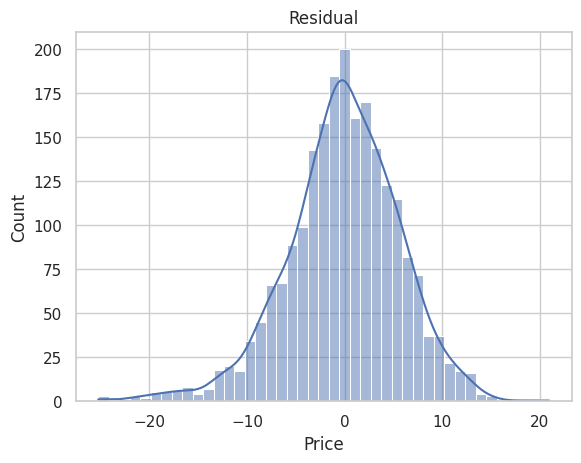

In [ ]:
#Based on this, choosing ridge as the final model

ridge_final = Ridge(alpha=0.5)
r_reg = ridge_final.fit(X_train,y_train)
predictions = r_reg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print("Root Mean Squared Error:", rmse)
print('R2 Score:', r_reg.score(X_test, y_test))

sns.histplot(y_test - predictions,kde=True)
plt.xlabel('Price')
plt.title('Residual')
plt.show()

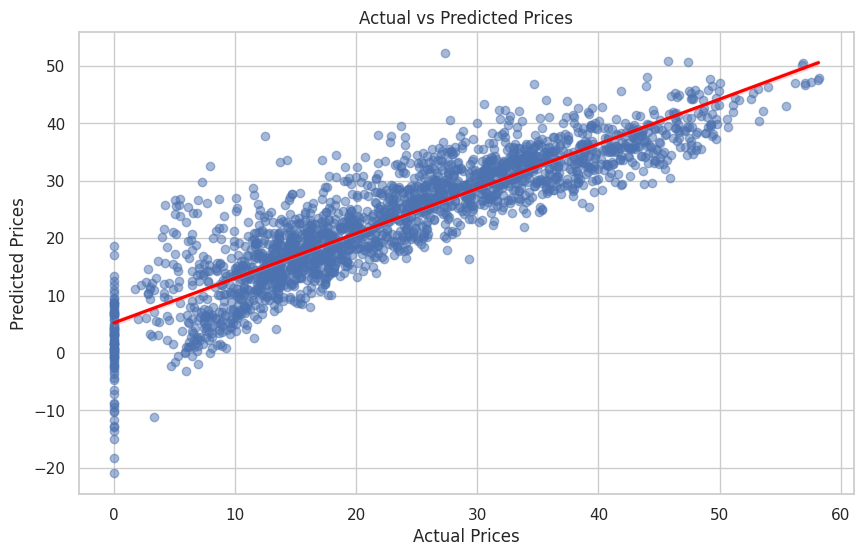

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plotting the regression
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


The model shows a strong R2 score, indicating a good fit to the data. However, the appropriateness of the MSE and RMSE values depends on the context, such as the range and scale of the target variable. For some applications, an RMSE of 2.125 might be excellent, while for others, it could be too high. Comparing these values to those obtained from other models or benchmarks in similar tasks can provide additional insights into the model's performance.

#Future Work:

1. **Regularization Tuning and Advanced Techniques:**
   - Perform a comprehensive grid search to fine-tune regularization parameters (e.g., Ridge’s alpha, Lasso’s alpha). Explore advanced regularization methods like Group Lasso or Adaptive Lasso to improve model generalization.

2. **Address Overfitting in SGD:**
   - Implement early stopping to prevent overfitting by monitoring validation loss. Experiment with learning rate schedules or momentum-based optimizers (e.g., Adam, RMSprop) to stabilize training and enhance performance.

3. **Model Complexity Reduction:**
   - Investigate reducing the polynomial degree or using dimensionality reduction techniques like PCA to prevent overfitting and simplify the model while maintaining good performance.

# **END**